<h1 style="color:#191970"> Classification Models</h1>

<h2 style="color:purple"> Import Necessary Libraries and Modules </h2>

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import visualizer
import sklearn.preprocessing as preproc
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, classification_report, mean_absolute_error, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression, RidgeClassifierCV, SGDClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import xgboost as xgb
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'imblearn'

<h3> Baseline Ridge Classifier Model</h3>

In [2]:
# read in the file
original = pd.read_json("og_data.json").reset_index().drop(["index"], axis=1)

In [3]:
print(original.shape)
print("-------------------------------------------------")
print(original.info())

(1167, 49)
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 49 columns):
rating                           1167 non-null int64
cluster_group                    1167 non-null int64
counts                           1167 non-null int64
name                             1167 non-null object
privatetutor                     1167 non-null int64
review_count                     1167 non-null int64
testprep                         1167 non-null int64
tutoring                         1167 non-null int64
1k_to_1499_rent                  1167 non-null float64
1.5k_to_1,999_rent               1167 non-null float64
150k_plus_salary                 1167 non-null float64
2k_plus_rent                     1167 non-null float64
30k_to_74,999_salary             1167 non-null float64
600_to_999_rent                  1167 non-null float64
75k_to_149,999_salary            1167 non-null float64
1_person_household    

We had to oversample our original data because we had a class imbalance. We will run a baseline model with the original data to see how it performs, then we will work with the oversampled data.

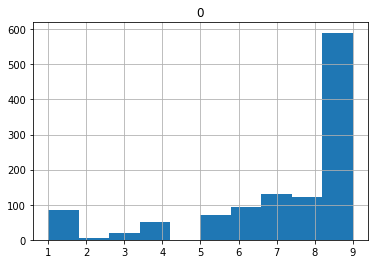

In [186]:
pd.DataFrame(y).hist();

In [27]:
# let's run a model to classify the business by the rating based off the other features.
X = original.drop(["rating", "name", "counts", "privatetutor", "testprep", "tutoring", "cluster_group"], axis=1)
y = original[["rating"]].astype(int).values.flatten()
scaler = preproc.Normalizer()
X_scaled = scaler.fit(X, y).transform(X)
trainX, testX, trainy, testy = train_test_split(X_scaled, y, test_size=.2, random_state=800)
clf = RidgeClassifierCV().fit(trainX, trainy)
pred = clf.predict(testX)
clf.score(testX, testy)

0.48717948717948717

In [188]:
print(classification_report(testy, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        28
           7       0.12      0.07      0.09        27
           8       1.00      0.05      0.09        21
           9       0.51      0.97      0.67       115

   micro avg       0.49      0.49      0.49       234
   macro avg       0.20      0.14      0.11       234
weighted avg       0.36      0.49      0.35       234



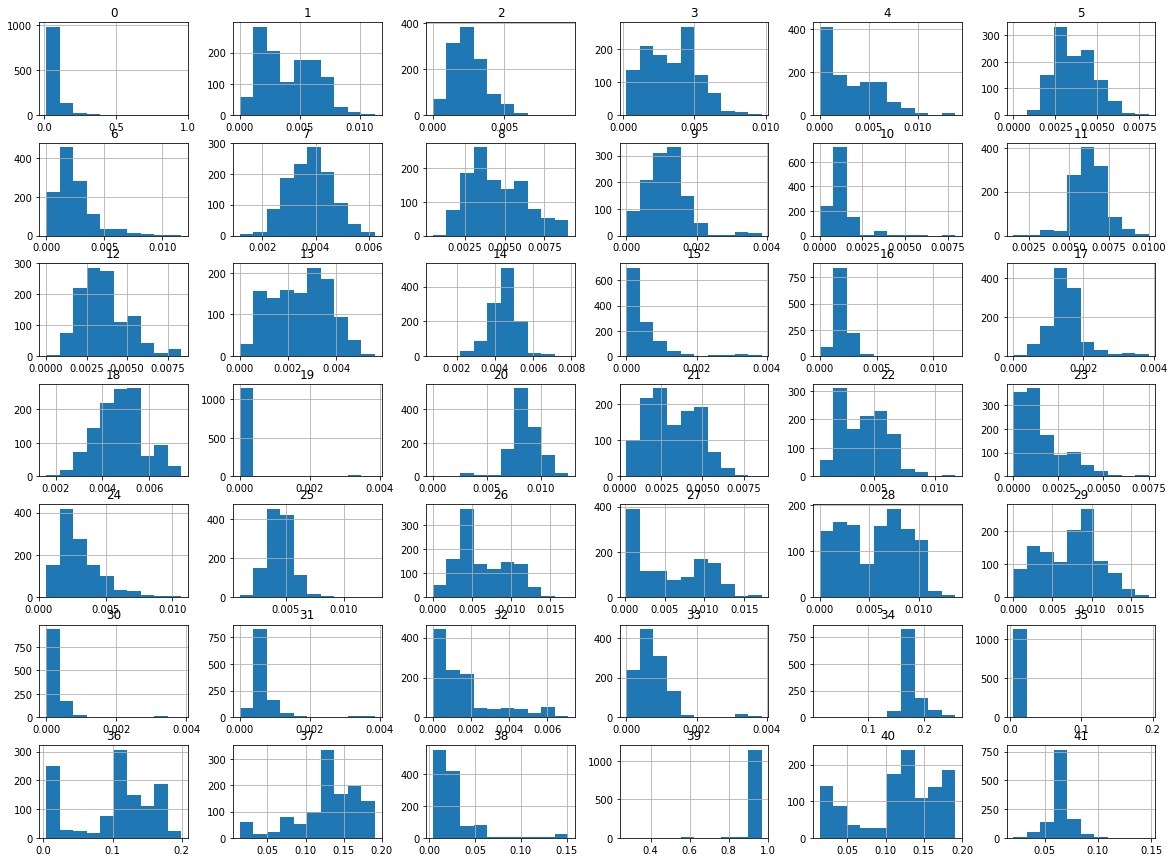

In [5]:
pd.DataFrame(X_scaled).hist(figsize=(20, 15));

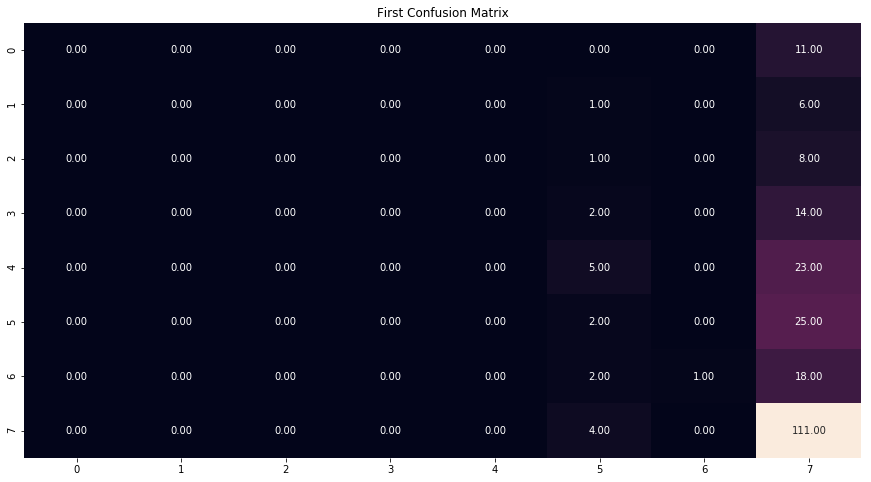

In [6]:
viz = visualizer.Visualizer()
viz.cf_matrix(testy, pred, "First Confusion Matrix")

Our baseline model has a mean accuracy of 50, makes sense since over 50% of our data has a rating 5(7). We can see from our confusion matrix that we did not guess any of the lower ratings. We need to oversample.

In [191]:
# let's run a model to classify the business by the rating based off the other features.
X_smote_all, y_smote_all = SMOTE(k_neighbors=4).fit_sample(X_scaled, y)
trainX_smote_all, testX_smote_all, trainy_smote_all, testy_smote_all = train_test_split(X_smote_all, y_smote_all, test_size=.2, random_state=800)

clf_smote = OneVsOneClassifier(RidgeClassifierCV()).fit(trainX_smote_all, trainy_smote_all)
pred_smote = clf_smote.predict(testX_smote_all)
clf_smote.score(testX_smote_all, testy_smote_all)

0.4387947269303202

In [193]:
print(classification_report(testy_smote_all,pred_smote))

              precision    recall  f1-score   support

           1       0.49      0.85      0.62       103
           2       0.52      1.00      0.69       115
           3       0.84      0.64      0.73       135
           4       0.31      0.19      0.24       108
           5       0.35      0.46      0.39       125
           6       0.37      0.25      0.29       118
           7       0.23      0.16      0.19       116
           8       0.43      0.27      0.33       130
           9       0.18      0.13      0.15       112

   micro avg       0.44      0.44      0.44      1062
   macro avg       0.41      0.44      0.40      1062
weighted avg       0.42      0.44      0.41      1062



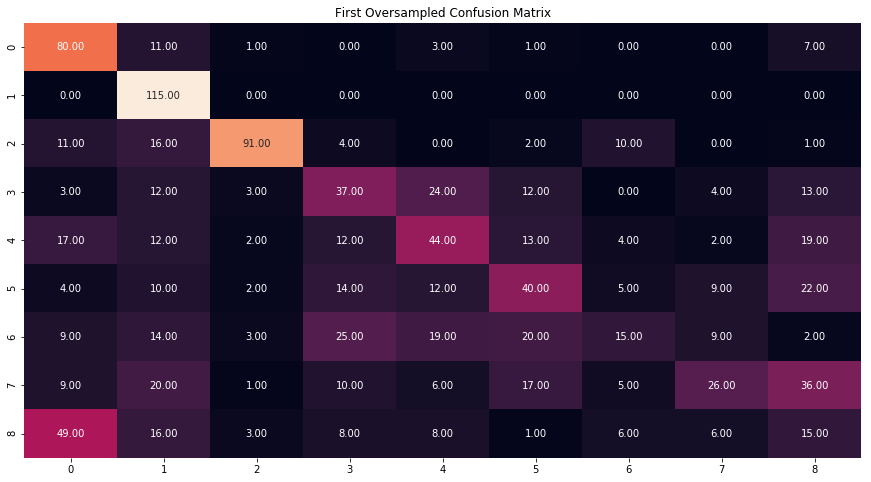

In [32]:
viz.cf_matrix(testy_smote_all, pred_smote, "First Oversampled Confusion Matrix")

Not great, but at least other ratings are being chosen. 

### Baseline SVM Model

#### SVC

In [33]:
clf3 = SVC().fit(trainX_smote_all, trainy_smote_all)
pred3 = clf3.predict(testX_smote_all)
clf3.score(testX_smote_all, testy_smote_all)

0.09698681732580038

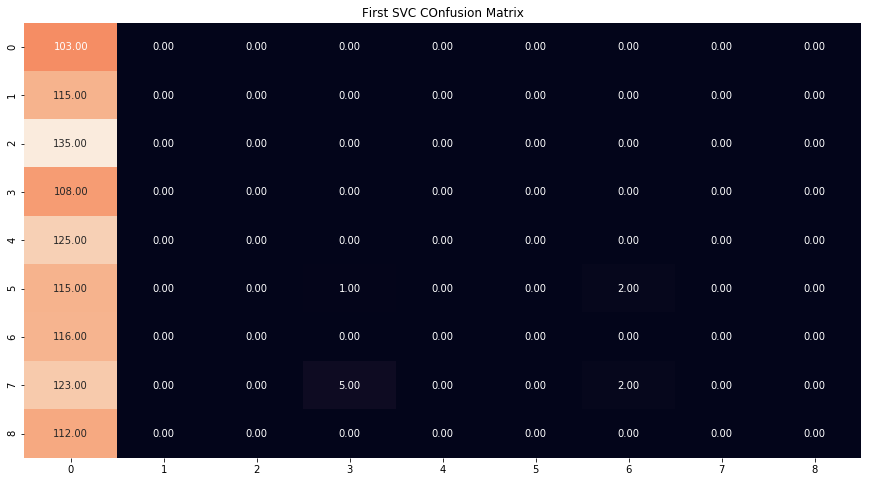

In [34]:
viz.cf_matrix(testy_smote, pred3, "First SVC COnfusion Matrix")

In [35]:
clf3_all = OneVsRestClassifier(SVC()).fit(trainX_smote_all, trainy_smote_all)
pred3_all = clf3_all.predict(testX_smote_all)
clf3_all.score(testX_smote_all, testy_smote_all)

0.2570621468926554

In [196]:
print(classification_report(testy_smote_all, pred3_all))

              precision    recall  f1-score   support

           1       0.33      0.72      0.46       103
           2       0.50      1.00      0.66       115
           3       0.21      0.32      0.25       135
           4       0.00      0.00      0.00       108
           5       0.00      0.00      0.00       125
           6       0.00      0.00      0.00       118
           7       0.00      0.00      0.00       116
           8       0.15      0.23      0.18       130
           9       0.05      0.10      0.07       112

   micro avg       0.26      0.26      0.26      1062
   macro avg       0.14      0.26      0.18      1062
weighted avg       0.14      0.26      0.18      1062



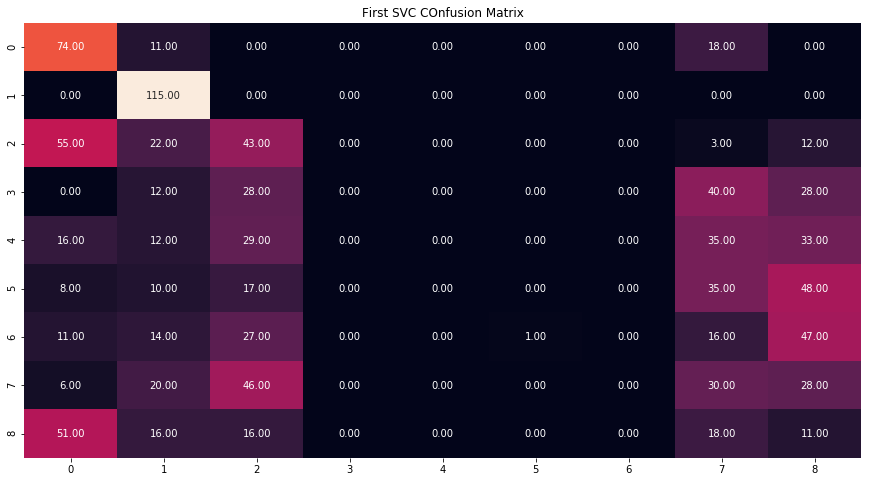

In [36]:
viz.cf_matrix(testy_smote, pred3_all, "First SVC COnfusion Matrix")

### Baseline KNN

In [198]:
knn = KNeighborsClassifier().fit(trainX_smote_all, trainy_smote_all)
pred_knn = knn.predict(testX_smote_all)
knn.score(testX_smote_all, testy_smote_all)

0.8210922787193974

In [199]:
print(classification_report(testy_smote_all, pred_knn))

              precision    recall  f1-score   support

           1       0.81      0.88      0.85       103
           2       0.96      1.00      0.98       115
           3       0.94      0.96      0.95       135
           4       0.77      0.95      0.85       108
           5       0.74      0.80      0.77       125
           6       0.81      0.85      0.83       118
           7       0.74      0.70      0.72       116
           8       0.82      0.77      0.79       130
           9       0.77      0.47      0.59       112

   micro avg       0.82      0.82      0.82      1062
   macro avg       0.82      0.82      0.81      1062
weighted avg       0.82      0.82      0.82      1062



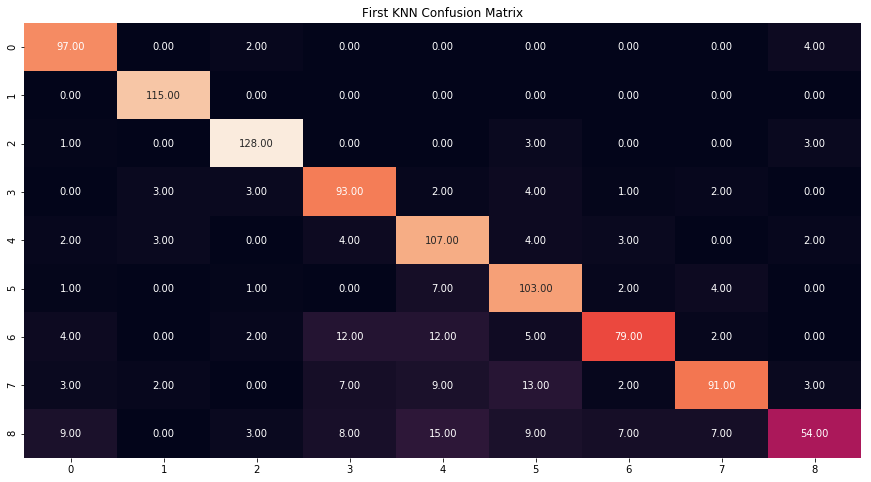

In [38]:
viz.cf_matrix(testy_smote, pred_knn, "First KNN Confusion Matrix")

### Baseline Random Forest

In [40]:
rf = RandomForestClassifier().fit(trainX_smote_all, trainy_smote_all)
pred_rf = rf.predict(testX_smote_all)
rf.score(testX_smote_all, testy_smote_all)

0.8436911487758946

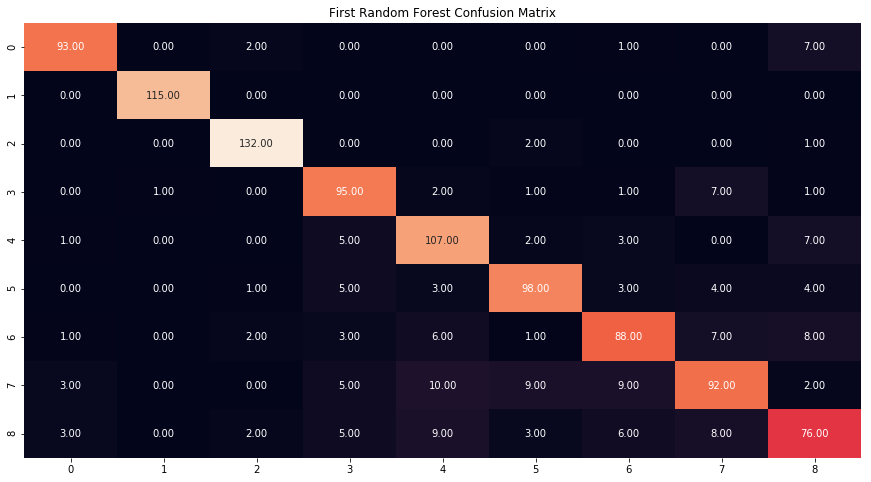

In [41]:
viz.cf_matrix(testy_smote_all, pred_rf, "First Random Forest Confusion Matrix")

In [43]:
print(classification_report(testy_smote_all, pred_rf))

              precision    recall  f1-score   support

           1       0.92      0.90      0.91       103
           2       0.99      1.00      1.00       115
           3       0.95      0.98      0.96       135
           4       0.81      0.88      0.84       108
           5       0.78      0.86      0.82       125
           6       0.84      0.83      0.84       118
           7       0.79      0.76      0.78       116
           8       0.78      0.71      0.74       130
           9       0.72      0.68      0.70       112

   micro avg       0.84      0.84      0.84      1062
   macro avg       0.84      0.84      0.84      1062
weighted avg       0.84      0.84      0.84      1062



These are very good results but we used synthetic data to test our model. Next we'll try to only use the upsampling to train but test on raw data.

### SMOTE only the Training Data

In [44]:
trainX_smote, trainy_smote = SMOTE(k_neighbors=4).fit_sample(trainX, trainy)

Since KNN was our best model. We will start with this.

In [200]:
knn = KNeighborsClassifier().fit(trainX_smote, trainy_smote)
pred_knn = knn.predict(testX)
knn.score(testX, testy)

0.45726495726495725

In [201]:
print(classification_report(testy, pred_knn))

              precision    recall  f1-score   support

           1       0.24      0.73      0.36        11
           3       0.50      0.57      0.53         7
           4       0.15      0.33      0.21         9
           5       0.16      0.19      0.17        16
           6       0.36      0.32      0.34        28
           7       0.27      0.33      0.30        27
           8       0.44      0.67      0.53        21
           9       0.89      0.50      0.64       115

   micro avg       0.46      0.46      0.46       234
   macro avg       0.38      0.45      0.39       234
weighted avg       0.59      0.46      0.49       234



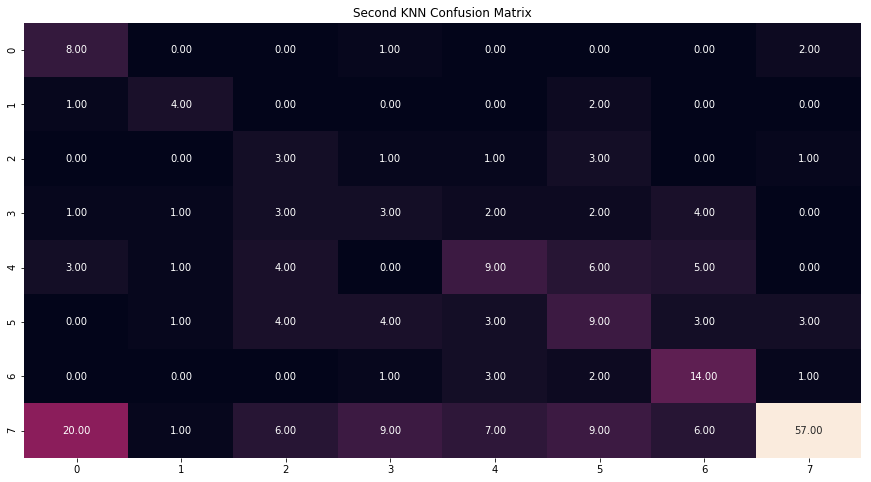

In [46]:
viz.cf_matrix(testy, pred_knn, "Second KNN Confusion Matrix")

In [81]:
rf2 = RandomForestClassifier().fit(trainX_smote, trainy_smote)
pred_rf2 = rf2.predict(testX)
rf2.score(testX, testy)

0.5384615384615384

In [93]:
rf2.criterion

'gini'

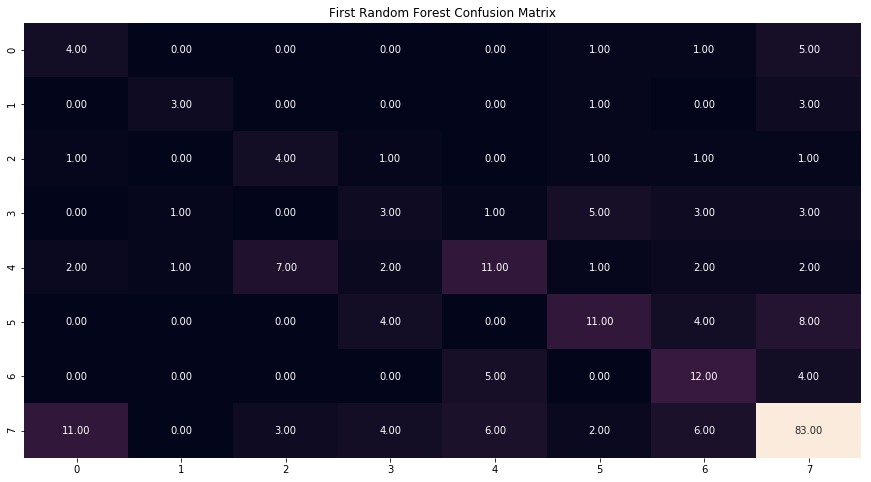

In [48]:
viz.cf_matrix(testy, pred_rf2, "First Random Forest Confusion Matrix")

In [49]:
print(classification_report(testy, pred_rf2))

              precision    recall  f1-score   support

           1       0.22      0.36      0.28        11
           3       0.60      0.43      0.50         7
           4       0.29      0.44      0.35         9
           5       0.21      0.19      0.20        16
           6       0.48      0.39      0.43        28
           7       0.50      0.41      0.45        27
           8       0.41      0.57      0.48        21
           9       0.76      0.72      0.74       115

   micro avg       0.56      0.56      0.56       234
   macro avg       0.43      0.44      0.43       234
weighted avg       0.58      0.56      0.57       234



Our Random Forest performed better than our KNN see how XGBoost performs.

In [97]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

xgb_clf = xgb.XGBClassifier().fit(trainX_smote, trainy_smote)
val_preds = xgb_clf.predict(testX)

xgb_clf.score(testX, testy)
# training_preds = xgb_clf.predict(trainX)
# training_accuracy = accuracy_score(trainy, training_preds)
# val_accuracy = accuracy_score(testy, val_preds)

# print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
# print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

0.5555555555555556

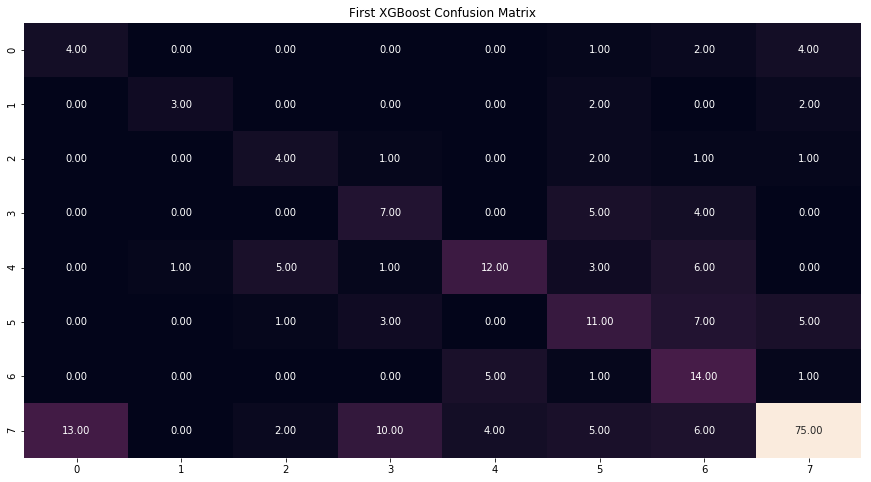

In [52]:
viz.cf_matrix(testy, val_preds, "First XGBoost Confusion Matrix")

In [53]:
print(classification_report(testy, val_preds))

              precision    recall  f1-score   support

           1       0.24      0.36      0.29        11
           3       0.75      0.43      0.55         7
           4       0.33      0.44      0.38         9
           5       0.32      0.44      0.37        16
           6       0.57      0.43      0.49        28
           7       0.37      0.41      0.39        27
           8       0.35      0.67      0.46        21
           9       0.85      0.65      0.74       115

   micro avg       0.56      0.56      0.56       234
   macro avg       0.47      0.48      0.46       234
weighted avg       0.63      0.56      0.58       234



### Parameter tuning

We will now do some parameter tuning with gridsearch.

In [62]:
paramgrid = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [4, 10, 5, 3, 20],
    "max_features" : [5, 10, 20, 30]
}
gsrf = GridSearchCV(rf2, param_grid=paramgrid, verbose=10, return_train_score=True)
gsrf.fit(trainX, trainy)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] criterion=gini, max_depth=4, max_features=5 .....................
[CV]  criterion=gini, max_depth=4, max_features=5, score=0.5936507936507937, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=5 .....................
[CV]  criterion=gini, max_depth=4, max_features=5, score=0.5787781350482315, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=5 .....................
[CV]  criterion=gini, max_depth=4, max_features=5, score=0.6286644951140065, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=10 ....................
[CV]  criterion=gini, max_depth=4, max_features=10, score=0.6444444444444445, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=10 ....................
[CV]  criterion=gini, max_depth=4, max_features=10, score=0.5916398713826366, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=10 ....................
[CV]  criterion=gini, max_depth=4, max_features=10, sco

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=20, score=0.6285714285714286, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=20 ....................
[CV]  criterion=gini, max_depth=4, max_features=20, score=0.6141479099678456, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=20 ....................
[CV]  criterion=gini, max_depth=4, max_features=20, score=0.6416938110749185, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=30 ....................
[CV]  criterion=gini, max_depth=4, max_features=30, score=0.6412698412698413, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=30 ....................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=30, score=0.5916398713826366, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=30 ....................
[CV]  criterion=gini, max_depth=4, max_features=30, score=0.6449511400651465, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=5 ....................
[CV]  criterion=gini, max_depth=10, max_features=5, score=0.5492063492063493, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=5 ....................
[CV]  criterion=gini, max_depth=10, max_features=5, score=0.5691318327974276, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=5 ....................
[CV]  criterion=gini, max_depth=10, max_features=5, score=0.5732899022801303, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10 ...................
[CV]  criterion=gini, max_depth=10, max_features=10, score=0.5746031746031746, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=10 ...................
[CV]  criterion=gini,

[CV]  criterion=entropy, max_depth=4, max_features=5, score=0.5819935691318328, total=   0.1s
[CV] criterion=entropy, max_depth=4, max_features=5 ..................
[CV]  criterion=entropy, max_depth=4, max_features=5, score=0.6091205211726385, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=10 .................
[CV]  criterion=entropy, max_depth=4, max_features=10, score=0.6253968253968254, total=   0.1s
[CV] criterion=entropy, max_depth=4, max_features=10 .................
[CV]  criterion=entropy, max_depth=4, max_features=10, score=0.6302250803858521, total=   0.1s
[CV] criterion=entropy, max_depth=4, max_features=10 .................
[CV]  criterion=entropy, max_depth=4, max_features=10, score=0.6384364820846905, total=   0.1s
[CV] criterion=entropy, max_depth=4, max_features=20 .................
[CV]  criterion=entropy, max_depth=4, max_features=20, score=0.6444444444444445, total=   0.1s
[CV] criterion=entropy, max_depth=4, max_features=20 .................
[CV]  

[CV]  criterion=entropy, max_depth=20, max_features=10, score=0.5993485342019544, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=20 ................
[CV]  criterion=entropy, max_depth=20, max_features=20, score=0.5396825396825397, total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=20 ................
[CV]  criterion=entropy, max_depth=20, max_features=20, score=0.5819935691318328, total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=20 ................
[CV]  criterion=entropy, max_depth=20, max_features=20, score=0.5732899022801303, total=   0.1s
[CV] criterion=entropy, max_depth=20, max_features=30 ................
[CV]  criterion=entropy, max_depth=20, max_features=30, score=0.5428571428571428, total=   0.3s
[CV] criterion=entropy, max_depth=20, max_features=30 ................
[CV]  criterion=entropy, max_depth=20, max_features=30, score=0.5659163987138264, total=   0.2s
[CV] criterion=entropy, max_depth=20, max_features=30 ...............

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   10.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 10, 5, 3, 20], 'max_features': [5, 10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [63]:
gsrf.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 10}

In [95]:
gsrf_clf = RandomForestClassifier(criterion='entropy',max_depth= 5,max_features=10).fit(trainX_smote, trainy_smote)
gsrf_clf.score(testX, testy)


0.44017094017094016

In [101]:
paramgrid_xgb = {
    
    "max_depth": [3, 5, 10],
    "learning_rate": [0.1, .01, .05, .5],
    "n_estimators": [100, 50, 10, 30],
    "objective": ["multi:softprob" , "multi:softmax"],
    "booster": ['gbtree', 'dart'],
    "gamma": [0, 1, 5, 10]
}
gsrf1 = GridSearchCV(xgb_clf, param_grid=paramgrid_xgb, verbose=10, return_train_score=True)
gsrf1.fit(trainX, trainy)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.5841269841269842, total=   1.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.5916398713826366, total=   2.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6156351791530945, total=   1.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.3s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.5841269841269842, total=   2.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.4s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.5916398713826366, total=   2.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.7s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6156351791530945, total=   2.2s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   12.9s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6412698412698413, total=   0.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   13.8s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6045016077170418, total=   1.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.9s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6612377850162866, total=   1.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   16.1s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6412698412698413, total=   1.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6045016077170418, total=   1.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6612377850162866, total=   1.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6476190476190476, total=   0.2s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob 
[

[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.5968253968253968, total=   1.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.5884244372990354, total=   1.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6123778501628665, total=   1.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.5968253968253968, total=   0.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softmax 

[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.653968253968254, total=   1.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6270096463022508, total=   2.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6547231270358306, total=   1.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.653968253968254, total=   0.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:

[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.5904761904761905, total=   0.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6077170418006431, total=   0.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6188925081433225, total=   0.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.5904761904761905, total=   0.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:

[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.5682539682539682, total=   1.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.5916398713826366, total=   1.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.5993485342019544, total=   1.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6412698412698413, total=   1.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=m

[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.5841269841269842, total=   1.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.5852090032154341, total=   1.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6091205211726385, total=   1.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.5841269841269842, total=   1.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:

[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.5714285714285714, total=   0.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6077170418006431, total=   0.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.5863192182410424, total=   0.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.5523809523809524, total=   1.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=30, objective=m

[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.5365079365079365, total=   2.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.572347266881029, total=   2.2s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.5830618892508144, total=   2.2s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.5365079365079365, total=   2.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:s

[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.5492063492063493, total=   1.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.5755627009646302, total=   1.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.5700325732899023, total=   1.5s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.546031746031746, total=   0.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:soft

[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6571428571428571, total=   0.7s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6141479099678456, total=   0.7s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6775244299674267, total=   0.7s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6571428571428571, total=   0.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softmax 

[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.5968253968253968, total=   4.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.5916398713826366, total=   5.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.5993485342019544, total=   4.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.5936507936507937, total=   1.9s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=50, objective=mult

[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6109324758842444, total=   0.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6514657980456026, total=   0.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6507936507936508, total=   0.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6109324758842444, total=   0.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:so

[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6270096463022508, total=   1.9s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6286644951140065, total=   1.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5746031746031746, total=   4.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5852090032154341, total=   4.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=100, objecti

[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.617363344051447, total=   1.0s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6807817589576547, total=   1.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6507936507936508, total=   1.0s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.617363344051447, total=   1.1s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:soft

[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6270096463022508, total=   0.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6286644951140065, total=   0.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.5968253968253968, total=   1.0s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.5980707395498392, total=   0.9s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:s

[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.5916398713826366, total=   2.0s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6188925081433225, total=   2.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6063492063492063, total=   1.7s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.5916398713826366, total=   1.7s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:so

[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.5787781350482315, total=   1.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.5993485342019544, total=   1.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.5777777777777777, total=   0.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6045016077170418, total=   0.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob 

[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.5787781350482315, total=   1.1s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.5863192182410424, total=   1.6s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.5523809523809524, total=   1.9s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.5787781350482315, total=   1.1s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:so

[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6141479099678456, total=   2.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6351791530944625, total=   2.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6476190476190476, total=   1.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6141479099678456, total=   1.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softpr

[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6205787781350482, total=   0.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6482084690553745, total=   0.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6317460317460317, total=   0.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6205787781350482, total=   0.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:so

[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6270096463022508, total=   0.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6547231270358306, total=   0.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6317460317460317, total=   2.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6237942122186495, total=   2.6s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, objective=mu

[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6205787781350482, total=   1.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6514657980456026, total=   1.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6444444444444445, total=   1.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6205787781350482, total=   1.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=50, objective=

[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6547231270358306, total=   0.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6412698412698413, total=   0.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.617363344051447, total=   0.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6579804560260586, total=   0.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:

[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6351791530944625, total=   4.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6444444444444445, total=   3.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6334405144694534, total=   4.0s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6351791530944625, total=   4.1s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=50, objec

[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6416938110749185, total=   0.9s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6444444444444445, total=   0.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6366559485530546, total=   0.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6416938110749185, total=   0.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax

[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6319218241042345, total=   0.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6444444444444445, total=   0.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6270096463022508, total=   0.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6319218241042345, total=   0.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softprob 


[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6188925081433225, total=   1.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6126984126984127, total=   0.9s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6109324758842444, total=   1.1s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6188925081433225, total=   1.0s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=50, objective=mult

[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6416938110749185, total=   0.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6476190476190476, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6141479099678456, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6416938110749185, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:soft

[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6123778501628665, total=   1.1s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6317460317460317, total=   1.6s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6045016077170418, total=   1.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6319218241042345, total=   1.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=100, 

[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6319218241042345, total=   1.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6476190476190476, total=   1.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.617363344051447, total=   1.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6319218241042345, total=   1.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=10, objective=mul

[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6416938110749185, total=   0.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6507936507936508, total=   1.0s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6205787781350482, total=   1.1s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6319218241042345, total=   1.1s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=30,

[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6221498371335505, total=   2.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6063492063492063, total=   2.5s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.5980707395498392, total=   2.6s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6221498371335505, total=   2.6s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=50, objec

[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6123778501628665, total=   1.9s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.653968253968254, total=   0.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6237942122186495, total=   0.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6351791530944625, total=   0.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, 

[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6351791530944625, total=   0.5s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6412698412698413, total=   0.5s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6012861736334405, total=   0.6s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6351791530944625, total=   0.5s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:sof

[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6449511400651465, total=   3.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.638095238095238, total=   1.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.617363344051447, total=   1.9s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6449511400651465, total=   1.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=50, objectiv

[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6476190476190476, total=   0.2s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6237942122186495, total=   0.2s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6482084690553745, total=   0.2s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6571428571428571, total=   0.6s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=dar

[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5691318327974276, total=   5.7s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5863192182410424, total=   5.4s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.5650793650793651, total=   5.2s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.5691318327974276, total=   5.3s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax 
[

[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6302250803858521, total=   1.1s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6514657980456026, total=   1.1s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6507936507936508, total=   0.2s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6109324758842444, total=   0.2s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  b

[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6286644951140065, total=   0.9s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6, total=   0.8s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6270096463022508, total=   0.9s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6286644951140065, total=   0.8s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gam

[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6579804560260586, total=   3.0s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6476190476190476, total=   1.1s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6141479099678456, total=   1.1s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6742671009771987, total=   1.1s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV] 

[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6286644951140065, total=   0.3s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.5904761904761905, total=   0.3s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.617363344051447, total=   0.3s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6286644951140065, total=   0.3s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  boost

[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.5765472312703583, total=   1.5s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.5682539682539682, total=   3.2s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.5819935691318328, total=   3.7s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.5895765472312704, total=   3.1s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV] 

[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.5523809523809524, total=   1.5s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.5691318327974276, total=   2.1s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.5863192182410424, total=   1.9s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.546031746031746, total=   0.3s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart

[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.5852090032154341, total=   1.0s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.5700325732899023, total=   1.1s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.5492063492063493, total=   1.0s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.5852090032154341, total=   1.0s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  boo

[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6351791530944625, total=   3.7s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6, total=   1.6s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.5916398713826366, total=   1.6s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6319218241042345, total=   1.6s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=1,

[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.5714285714285714, total=   0.4s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.5916398713826366, total=   0.4s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.5863192182410424, total=   0.4s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.5904761904761905, total=   1.3s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  boo

[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6077170418006431, total=   4.5s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6188925081433225, total=   4.7s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6, total=   4.2s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6077170418006431, total=   3.9s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=da

[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6012861736334405, total=   2.1s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.5863192182410424, total=   2.4s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.5682539682539682, total=   0.4s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.5916398713826366, total=   0.6s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob 

[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6237942122186495, total=   0.6s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6742671009771987, total=   0.6s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6476190476190476, total=   0.6s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6237942122186495, total=   0.6s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  boo

[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.5852090032154341, total=   5.1s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.5993485342019544, total=   6.3s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.5746031746031746, total=   3.1s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.5819935691318328, total=   2.8s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softpr

[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.594855305466238, total=   0.2s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6123778501628665, total=   0.2s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6158730158730159, total=   0.2s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.594855305466238, total=   0.2s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart,

[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.5993485342019544, total=   0.9s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5523809523809524, total=   4.3s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5787781350482315, total=   4.6s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5863192182410424, total=   5.5s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax 


[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6476190476190476, total=   1.3s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6270096463022508, total=   1.1s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6514657980456026, total=   1.2s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.638095238095238, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart

[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6141479099678456, total=   0.8s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6416938110749185, total=   0.8s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6412698412698413, total=   0.8s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6141479099678456, total=   0.8s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dar

[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6270096463022508, total=   2.4s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6547231270358306, total=   2.4s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6444444444444445, total= -26.0s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6334405144694534, total=   1.0s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]

[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6237942122186495, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6221498371335505, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6095238095238096, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6237942122186495, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  boo

[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6205787781350482, total=   1.2s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6416938110749185, total=   1.2s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6476190476190476, total=   2.3s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6237942122186495, total=   2.3s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob 

[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6205787781350482, total=   1.4s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6644951140065146, total=   1.5s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6412698412698413, total=   1.4s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6205787781350482, total=   1.5s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  boo

[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6205787781350482, total=   0.5s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6449511400651465, total=   0.4s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.638095238095238, total=   1.2s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6205787781350482, total=   1.2s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=30, objective=multi:softprob 


[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6319218241042345, total=   3.1s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6444444444444445, total=   2.9s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6270096463022508, total=   3.0s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6319218241042345, total=   3.1s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  boost

[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6063492063492063, total=   0.4s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.617363344051447, total=   0.4s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6254071661237784, total=   0.4s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6063492063492063, total=   0.4s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  bo

[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6126984126984127, total=   0.5s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.617363344051447, total=   0.6s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6188925081433225, total=   0.6s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6095238095238096, total=   3.3s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  b

[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6095238095238096, total=   1.9s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6109324758842444, total=   2.0s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6123778501628665, total=   2.0s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6095238095238096, total=   1.9s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softmax 

[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6476190476190476, total=   0.2s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6045016077170418, total=   0.2s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6384364820846905, total=   0.2s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6476190476190476, total=   0.5s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softprob 
[

[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6317460317460317, total=   4.1s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.617363344051447, total=   4.2s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6384364820846905, total=   4.5s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6317460317460317, total=   4.3s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective

[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6158730158730159, total=   0.9s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6045016077170418, total=   1.0s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6221498371335505, total=   1.0s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6507936507936508, total=   0.2s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=10, objective=multi:softprob 
[

[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6349206349206349, total=   0.8s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6012861736334405, total=   0.8s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6188925081433225, total=   0.8s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6349206349206349, total=   0.8s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax 

[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6412698412698413, total=   2.1s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6012861736334405, total=   2.2s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6351791530944625, total=   2.1s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6412698412698413, total=   1.0s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]

[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.617363344051447, total=   0.4s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6449511400651465, total=   0.3s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.638095238095238, total=   0.4s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.617363344051447, total=   0.3s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booste

[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.617363344051447, total=   1.1s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6449511400651465, total=   1.1s


[Parallel(n_jobs=1)]: Done 2304 out of 2304 | elapsed: 69.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 10], 'learning_rate': [0.1, 0.01, 0.05, 0.5], 'n_estimators': [100, 50, 10, 30], 'objective': ['multi:softprob', 'multi:softmax'], 'booster': ['gbtree', 'dart'], 'gamma': [0, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [102]:
preds = gsrf1.predict(testX)
gsrf1.score(testX, testy)

0.6495726495726496

In [106]:
print(classification_report(testy, preds))

              precision    recall  f1-score   support

           1       1.00      0.27      0.43        11
           3       1.00      0.14      0.25         7
           4       1.00      0.44      0.62         9
           5       1.00      0.12      0.22        16
           6       0.80      0.29      0.42        28
           7       0.43      0.44      0.44        27
           8       0.65      0.52      0.58        21
           9       0.66      0.97      0.78       115

   micro avg       0.65      0.65      0.65       234
   macro avg       0.82      0.40      0.47       234
weighted avg       0.71      0.65      0.60       234



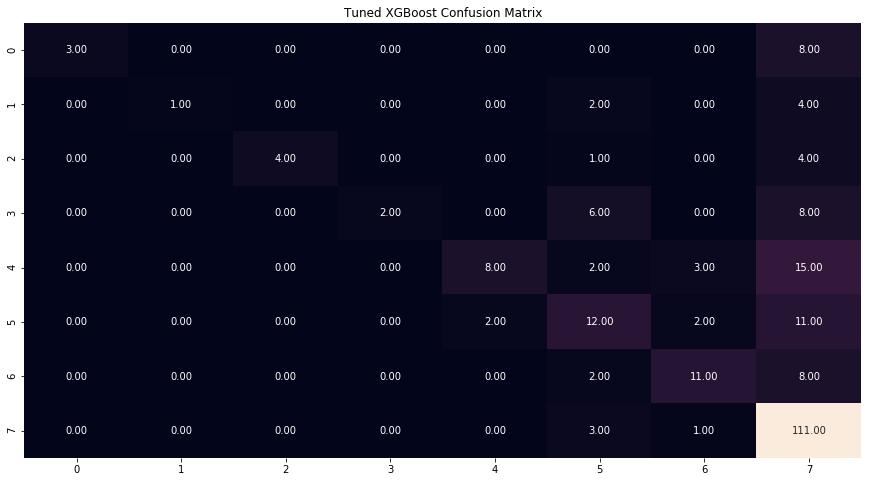

In [107]:
viz.cf_matrix(testy, preds, "Tuned XGBoost Confusion Matrix")

In [103]:
gsrf1.best_params_

{'booster': 'gbtree',
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 30,
 'objective': 'multi:softprob'}

In [104]:
gsrf1.best_score_

0.6495176848874598

In [115]:
fin = pd.read_json("final_df1.json").reset_index().drop(["index", "name", "reviews"], axis=1)

In [116]:
X_fin = fin.drop(["rating"], axis=1)
y_fin = pd.DataFrame(fin.rating)

In [118]:
xfintrain, xfintest, yfintrain, yfintest = train_test_split(X_fin, y_fin)

In [119]:
rf4 = RandomForestClassifier().fit(xfintrain, yfintrain)
pred_rf4 = rf4.predict(xfintest)
rf4.score(xfintest, yfintest)

0.6413793103448275

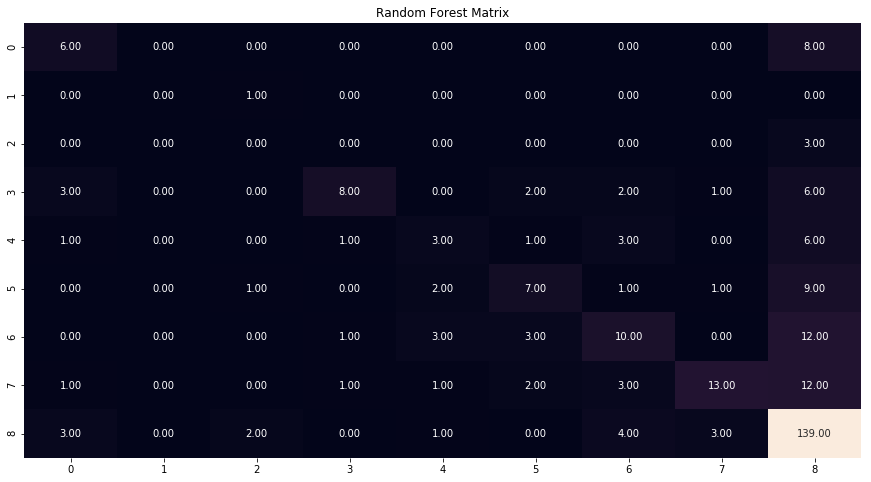

In [120]:
viz.cf_matrix(yfintest,pred_rf4, "Random Forest Matrix")

In [148]:
xgb_clf = xgb.XGBClassifier().fit(xfintrain, yfintrain)
val_preds = xgb_clf.predict(xfintest)

xgb_clf.score(xfintest, yfintest)

0.6655172413793103

In [183]:
X_fin.shape

(1158, 52)

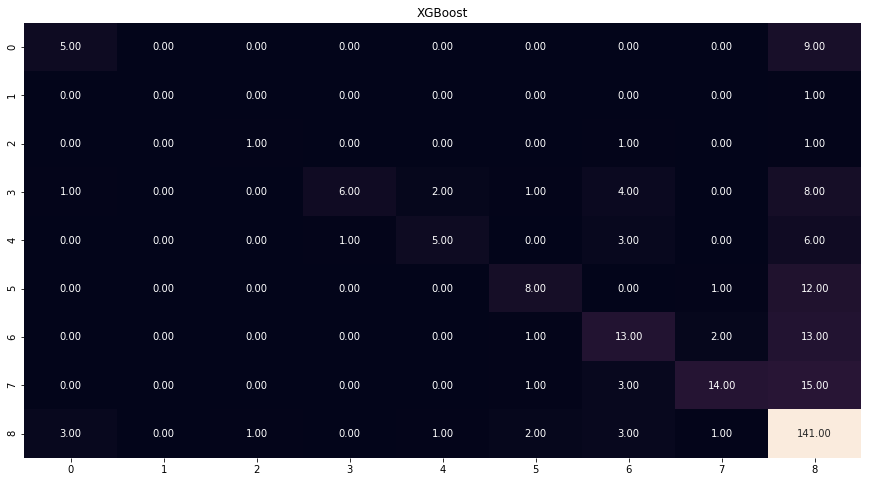

In [124]:
viz.cf_matrix(yfintest,val_preds, "XGBoost")

In [149]:
paramgrid_xgb = {
    
    "max_depth": [3, 5, 10, 15],
    "learning_rate": [0.1, .01, .05, .5, .001, .03, .3],
    "n_estimators": [100, 50, 10, 30, 200],
    "objective": ["multi:softprob" , "multi:softmax"],
    "booster": ['gbtree', 'dart'],
    "gamma": [0, 1, 5, 10]
}
gsrf1 = GridSearchCV(xgb_clf, param_grid=paramgrid_xgb, verbose=10, return_train_score=True)
gsrf1.fit(xfintrain, yfintrain)

Fitting 3 folds for each of 2240 candidates, totalling 6720 fits
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6404109589041096, total=   1.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.643598615916955, total=   1.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.627177700348432, total=   1.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6404109589041096, total=   1.5s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.3s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.643598615916955, total=   1.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.3s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.627177700348432, total=   1.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.2s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6438356164383562, total=   0.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.1s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.643598615916955, total=   1.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.2s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6411149825783972, total=   1.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   13.3s remaining:    0.0s


[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6438356164383562, total=   1.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.643598615916955, total=   1.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6411149825783972, total=   0.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6438356164383562, total=   0.2s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob 
[C

[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.660958904109589, total=   0.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6401384083044983, total=   0.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6376306620209059, total=   0.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.660958904109589, total=   0.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax 
[

[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6404109589041096, total=   0.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6262975778546713, total=   0.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.5923344947735192, total=   0.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6301369863013698, total=   1.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:sof

[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.6506849315068494, total=   1.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.6193771626297578, total=   1.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.5923344947735192, total=   1.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.6506849315068494, total=   1.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:

[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6301369863013698, total=   0.5s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.629757785467128, total=   0.5s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6550522648083623, total=   0.5s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softprob, score=0.6541095890410958, total=   3.5s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:s

[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6712328767123288, total=   4.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6401384083044983, total=   4.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6376306620209059, total=   5.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softmax, score=0.6712328767123288, total=   4.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objectiv

[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6575342465753424, total=   6.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6020761245674741, total=   7.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.5888501742160279, total=   7.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.6643835616438356, total=   3.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.01, max_depth=15, n_estimators=100, obj

[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6575342465753424, total=   1.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6401384083044983, total=   1.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6376306620209059, total=   1.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6575342465753424, total=   1.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objectiv

[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.660958904109589, total=   2.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6193771626297578, total=   2.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6202090592334495, total=   2.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6746575342465754, total=   1.2s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi

[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6541095890410958, total=   2.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6124567474048442, total=   1.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.5888501742160279, total=   1.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6541095890410958, total=   1.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objectiv

[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.636986301369863, total=   1.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.6124567474048442, total=   1.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.6062717770034843, total=   1.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.6643835616438356, total=   0.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=10, objective=mu

[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6366782006920415, total=   0.2s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6341463414634146, total=   0.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6575342465753424, total=   0.2s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6366782006920415, total=   0.2s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax 
[

[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.615916955017301, total=   0.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.5853658536585366, total=   0.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6164383561643836, total=   0.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6193771626297578, total=   0.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob 


[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.5882352941176471, total=   0.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.578397212543554, total=   0.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.636986301369863, total=   0.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.5882352941176471, total=   0.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:soft

[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.6124567474048442, total=   0.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.5609756097560976, total=   0.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6198630136986302, total=   2.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6089965397923875, total=   2.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=200, objective=mu

[CV]  booster=gbtree, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softprob, score=0.629757785467128, total=   3.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softprob, score=0.6515679442508711, total=   3.0s
[CV] booster=gbtree, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6301369863013698, total=   2.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.629757785467128, total=   3.2s
[CV] booster=gbtree, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=200, obje

[CV]  booster=gbtree, gamma=0, learning_rate=0.001, max_depth=5, n_estimators=200, objective=multi:softmax, score=0.6228373702422145, total=   4.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.001, max_depth=5, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.001, max_depth=5, n_estimators=200, objective=multi:softmax, score=0.6306620209059234, total=   4.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6404109589041096, total=   3.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5951557093425606, total=   3.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.001, max_depth=10, n_estimators=1

[CV]  booster=gbtree, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.6438356164383562, total=   3.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.6055363321799307, total=   3.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.5853658536585366, total=   3.5s
[CV] booster=gbtree, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6438356164383562, total=   3.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.001, max_depth=15, n_estimato

[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6480836236933798, total=   1.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6541095890410958, total=   1.5s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6470588235294118, total=   1.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6480836236933798, total=   1.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=50, objective=mul

[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6306620209059234, total=   2.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6815068493150684, total=   1.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6366782006920415, total=   1.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6306620209059234, total=   1.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=50, objective=mult

[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.5993031358885017, total=   1.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6575342465753424, total=   1.6s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6089965397923875, total=   1.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.5993031358885017, total=   1.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=10, objective=mu

[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.5853658536585366, total=   1.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.6438356164383562, total=   0.3s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.6124567474048442, total=   0.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.5958188153310104, total=   0.4s
[CV] booster=gbtree, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=10, objecti

[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6472602739726028, total=   0.2s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6262975778546713, total=   0.2s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6585365853658537, total=   0.2s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6404109589041096, total=   0.5s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softprob 
[

[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6301369863013698, total=   0.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.615916955017301, total=   0.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6097560975609756, total=   0.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6301369863013698, total=   0.7s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softmax 


[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6301369863013698, total=   0.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6089965397923875, total=   0.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.5993031358885017, total=   0.9s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6267123287671232, total=   3.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:

[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6335616438356164, total=   3.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6020761245674741, total=   3.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.5749128919860628, total=   3.8s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=0, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6335616438356164, total=   3.1s
[CV] booster=gbtree, gamma=0, learning_rate=0.3, max_depth=15, n_estimators=200, objectiv

[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6712328767123288, total=   2.9s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6401384083044983, total=   3.1s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6341463414634146, total=   3.1s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.660958904109589, total=   2.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:soft

[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.660958904109589, total=   3.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6470588235294118, total=   3.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5888501742160279, total=   3.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.660958904109589, total=   3.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=100, objective=

[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6746575342465754, total=   3.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6366782006920415, total=   3.6s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.5993031358885017, total=   3.6s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6746575342465754, total=   1.7s
[CV] booster=gbtree, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=50, objective=mult

[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6404109589041096, total=   0.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6366782006920415, total=   0.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6550522648083623, total=   0.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6404109589041096, total=   0.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:

[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6712328767123288, total=   1.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6332179930795848, total=   1.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6445993031358885, total=   1.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6472602739726028, total=   0.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:sof

[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6438356164383562, total=   0.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6124567474048442, total=   0.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.5993031358885017, total=   0.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6438356164383562, total=   0.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=10, objectiv

[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6438356164383562, total=   0.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6193771626297578, total=   0.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.5958188153310104, total=   0.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.6438356164383562, total=   1.0s
[CV] booster=gbtree, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=30, objective=m

[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6506849315068494, total=   0.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6505190311418685, total=   0.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6480836236933798, total=   0.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6506849315068494, total=   0.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:

[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6678082191780822, total=   0.7s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6366782006920415, total=   0.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6341463414634146, total=   0.7s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6575342465753424, total=   4.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=200, objective=multi:

[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6678082191780822, total=   6.6s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6470588235294118, total=   6.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.5853658536585366, total=   6.9s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6678082191780822, total=   6.6s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=200, 

[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6712328767123288, total=   7.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6332179930795848, total=   7.0s
[CV] booster=gbtree, gamma=1, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.5958188153310104, total=   7.6s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.660958904109589, total=   1.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=100, objective=

[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6438356164383562, total=   2.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6124567474048442, total=   2.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.5993031358885017, total=   2.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6438356164383562, total=   2.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:

[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6506849315068494, total=   3.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6193771626297578, total=   3.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.5993031358885017, total=   3.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6506849315068494, total=   1.6s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=50, objective=mult

[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.678082191780822, total=   1.7s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.643598615916955, total=   1.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6027874564459931, total=   1.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.678082191780822, total=   1.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:sof

[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6164383561643836, total=   0.7s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.615916955017301, total=   0.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6202090592334495, total=   0.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.613013698630137, total=   0.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=10, objective=mul

[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6438356164383562, total=   0.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6228373702422145, total=   0.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.5888501742160279, total=   0.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6438356164383562, total=   0.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=10, objectiv

[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6198630136986302, total=   0.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6089965397923875, total=   0.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.5644599303135889, total=   0.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6301369863013698, total=   1.0s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=30, obj

[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.5644599303135889, total=   0.3s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.6301369863013698, total=   1.0s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.615916955017301, total=   1.1s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.5609756097560976, total=   1.0s
[CV] booster=gbtree, gamma=1, learning_rate=0.001, max_depth=15, n_estimators=30, 

[CV]  booster=gbtree, gamma=1, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6515679442508711, total=   0.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6438356164383562, total=   0.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.643598615916955, total=   0.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6515679442508711, total=   0.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.03, max_depth=3, n_estimators=200, objective=multi:soft

[CV]  booster=gbtree, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6376306620209059, total=   0.7s
[CV] booster=gbtree, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6678082191780822, total=   4.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6332179930795848, total=   4.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6132404181184669, total=   4.7s
[CV] booster=gbtree, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=200, objectiv

[CV]  booster=gbtree, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.5853658536585366, total=   6.9s
[CV] booster=gbtree, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6746575342465754, total=   6.6s
[CV] booster=gbtree, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6332179930795848, total=   6.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.5853658536585366, total=   6.9s
[CV] booster=gbtree, gamma=1, learning_rate=0.03, max_depth=15, n_estimators=100, obje

[CV]  booster=gbtree, gamma=1, learning_rate=0.03, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.5958188153310104, total=   7.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6678082191780822, total=   1.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6332179930795848, total=   1.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6341463414634146, total=   1.5s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=100, objective=mul

[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.5923344947735192, total=   2.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6643835616438356, total=   2.2s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6366782006920415, total=   2.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.5923344947735192, total=   2.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=50, objective=multi:softp

[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6097560975609756, total=   3.4s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6541095890410958, total=   1.6s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.629757785467128, total=   1.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6097560975609756, total=   1.9s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=50, objective=multi

[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.5993031358885017, total=   1.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.660958904109589, total=   1.7s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.6366782006920415, total=   1.8s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.5993031358885017, total=   2.0s
[CV] booster=gbtree, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=10, objective=multi:softp

[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6236933797909407, total=   0.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6438356164383562, total=   0.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6505190311418685, total=   0.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6515679442508711, total=   0.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softmax

[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6480836236933798, total=   0.3s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6438356164383562, total=   0.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6608996539792388, total=   0.3s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6480836236933798, total=   0.3s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob 
[C

[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6480836236933798, total=   0.3s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6472602739726028, total=   1.0s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.657439446366782, total=   1.0s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6411149825783972, total=   1.0s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:

[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.6341463414634146, total=   1.1s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.6472602739726028, total=   1.0s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.657439446366782, total=   1.1s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.6341463414634146, total=   1.1s
[CV] booster=gbtree, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=200, objective=multi:soft

[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.662020905923345, total=   0.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softprob, score=0.6472602739726028, total=   2.9s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softprob, score=0.6505190311418685, total=   3.0s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softprob, score=0.6515679442508711, total=   3.1s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=200, objective

[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6515679442508711, total=   4.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softmax, score=0.6472602739726028, total=   4.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softmax, score=0.671280276816609, total=   4.9s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softmax, score=0.6515679442508711, total=   5.3s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=100, objective=mu

[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6445993031358885, total=   6.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.6541095890410958, total=   3.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.6747404844290658, total=   3.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.6445993031358885, total=   3.6s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=100,

[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6167247386759582, total=   1.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6404109589041096, total=   1.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6470588235294118, total=   1.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6167247386759582, total=   1.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=50, objective=mul

[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6236933797909407, total=   2.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6472602739726028, total=   1.1s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.671280276816609, total=   1.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6376306620209059, total=   1.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi

[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6480836236933798, total=   1.9s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6541095890410958, total=   1.6s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6643598615916955, total=   1.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6480836236933798, total=   1.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=10, objective=mu

[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.6515679442508711, total=   1.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.660958904109589, total=   0.3s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.671280276816609, total=   0.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.6411149825783972, total=   0.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=10, objective

[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.660958904109589, total=   0.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.643598615916955, total=   0.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6411149825783972, total=   0.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.660958904109589, total=   0.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]

[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6438356164383562, total=   0.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.657439446366782, total=   0.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6202090592334495, total=   0.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6438356164383562, total=   0.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax 


[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6506849315068494, total=   1.0s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6505190311418685, total=   1.0s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6167247386759582, total=   1.0s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6506849315068494, total=   6.9s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:

[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6506849315068494, total=   7.1s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6505190311418685, total=   6.9s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6202090592334495, total=   7.1s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6506849315068494, total=   7.1s
[CV] booster=gbtree, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=200, objectiv

[CV]  booster=gbtree, gamma=5, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6232876712328768, total=   2.9s
[CV] booster=gbtree, gamma=5, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6366782006920415, total=   3.0s
[CV] booster=gbtree, gamma=5, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6550522648083623, total=   3.0s
[CV] booster=gbtree, gamma=5, learning_rate=0.001, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.001, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6541095890410958, total=   2.3s
[CV] booster=gbtree, gamma=5, learning_rate=0.001, max_depth=5, n_estimators=100, obj

[CV]  booster=gbtree, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.660958904109589, total=   3.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6643598615916955, total=   3.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6236933797909407, total=   3.3s
[CV] booster=gbtree, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.660958904109589, total=   3.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.001, max_depth=10, n_estimators

[CV]  booster=gbtree, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.6306620209059234, total=   3.3s
[CV] booster=gbtree, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.660958904109589, total=   3.3s
[CV] booster=gbtree, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6643598615916955, total=   3.6s
[CV] booster=gbtree, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6306620209059234, total=   3.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=50

[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6470588235294118, total=   1.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6236933797909407, total=   1.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6541095890410958, total=   0.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6470588235294118, total=   0.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=50, objective=mult

[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6747404844290658, total=   1.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6550522648083623, total=   1.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6506849315068494, total=   1.1s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6747404844290658, total=   1.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:so

[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6608996539792388, total=   1.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6480836236933798, total=   1.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6541095890410958, total=   0.3s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6608996539792388, total=   0.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=10, n_estimators=10, objective

[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.6608996539792388, total=   0.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.6376306620209059, total=   0.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6541095890410958, total=   0.3s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6608996539792388, total=   0.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.03, max_depth=15, n_estimators=10, objective=

[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6411149825783972, total=   0.2s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.636986301369863, total=   0.4s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.657439446366782, total=   0.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6306620209059234, total=   0.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softmax 


[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6376306620209059, total=   0.8s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6404109589041096, total=   0.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.657439446366782, total=   0.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6376306620209059, total=   0.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softprob 
[C

[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6376306620209059, total=   1.0s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6541095890410958, total=   6.6s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6401384083044983, total=   6.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6376306620209059, total=   6.9s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=200, objectiv

[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6376306620209059, total=   7.0s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6541095890410958, total=   6.9s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6401384083044983, total=   6.7s
[CV] booster=gbtree, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6376306620209059, total=   7.0s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=100, objective=mu

[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.5888501742160279, total=   3.1s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6267123287671232, total=   2.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6193771626297578, total=   2.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.5888501742160279, total=   2.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=100, objecti

[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5888501742160279, total=   3.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6267123287671232, total=   3.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6228373702422145, total=   3.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.5888501742160279, total=   3.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=50, objec

[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.5888501742160279, total=   3.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6267123287671232, total=   1.6s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6228373702422145, total=   1.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.5888501742160279, total=   1.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=50, object

[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6341463414634146, total=   0.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.613013698630137, total=   0.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6401384083044983, total=   0.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6341463414634146, total=   0.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=10, objective=mul

[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6445993031358885, total=   1.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6472602739726028, total=   0.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6470588235294118, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6306620209059234, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=10, objecti

[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6306620209059234, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6472602739726028, total=   0.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6470588235294118, total=   0.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6306620209059234, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=30, obje

[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6470588235294118, total=   0.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6306620209059234, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.6404109589041096, total=   1.0s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.6608996539792388, total=   1.1s
[CV] booster=gbtree, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=30, o

[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6366782006920415, total=   0.5s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.5923344947735192, total=   0.5s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6267123287671232, total=   0.5s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6366782006920415, total=   0.5s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=30, objective=

[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6332179930795848, total=   0.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6167247386759582, total=   0.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.613013698630137, total=   4.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6193771626297578, total=   4.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=200, objec

[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.613013698630137, total=   6.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6193771626297578, total=   6.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.5888501742160279, total=   6.6s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.613013698630137, total=   6.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=10, n_estimators

[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.5888501742160279, total=   6.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.613013698630137, total=   6.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6193771626297578, total=   6.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.5888501742160279, total=   6.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=100,

[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6027874564459931, total=   3.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6438356164383562, total=   2.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6366782006920415, total=   2.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.5888501742160279, total=   2.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=100, objecti

[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5888501742160279, total=   3.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6438356164383562, total=   3.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6366782006920415, total=   3.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.5888501742160279, total=   3.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=50, objec

[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.5888501742160279, total=   3.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6438356164383562, total=   1.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6366782006920415, total=   1.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.5888501742160279, total=   1.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.5, max_depth=15, n_estimators=50, object

[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.627177700348432, total=   0.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.5924657534246576, total=   0.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.643598615916955, total=   0.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.627177700348432, total=   0.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=3, n_estimators=10, objecti

[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6505190311418685, total=   1.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6062717770034843, total=   1.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6404109589041096, total=   0.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.643598615916955, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=10, ob

[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6404109589041096, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.643598615916955, total=   0.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.5853658536585366, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6404109589041096, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=10, n_estimato

[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.5853658536585366, total=   0.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6404109589041096, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.643598615916955, total=   0.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.5853658536585366, total=   0.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=3

[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6445993031358885, total=   0.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6164383561643836, total=   0.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6401384083044983, total=   0.5s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.627177700348432, total=   0.5s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=30, objectiv

[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6341463414634146, total=   0.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6438356164383562, total=   0.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.643598615916955, total=   0.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6341463414634146, total=   0.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=200, objective=mu

[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6376306620209059, total=   1.0s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.613013698630137, total=   6.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6193771626297578, total=   6.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.5888501742160279, total=   6.6s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=10, n_estimator

[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6193771626297578, total=   6.9s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.5888501742160279, total=   6.8s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.613013698630137, total=   6.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6193771626297578, total=   6.9s
[CV] booster=gbtree, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=

[CV]  booster=gbtree, gamma=10, learning_rate=0.3, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6228373702422145, total=   3.0s
[CV] booster=gbtree, gamma=10, learning_rate=0.3, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.3, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.5923344947735192, total=   3.0s
[CV] booster=gbtree, gamma=10, learning_rate=0.3, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.3, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6301369863013698, total=   2.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.3, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.3, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6332179930795848, total=   2.3s
[CV] booster=gbtree, gamma=10, learning_rate=0.3, max_depth=5, n_estimators=100, objective

[CV]  booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6332179930795848, total=   3.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5958188153310104, total=   3.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6301369863013698, total=   3.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6332179930795848, total=   3.2s
[CV] booster=gbtree, gamma=10, learning_rate=0.3, max_depth=10, n_estimators=100, ob

[CV]  booster=gbtree, gamma=10, learning_rate=0.3, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6332179930795848, total=   3.4s
[CV] booster=gbtree, gamma=10, learning_rate=0.3, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=gbtree, gamma=10, learning_rate=0.3, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.5958188153310104, total=   3.5s
[CV] booster=gbtree, gamma=10, learning_rate=0.3, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.3, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6301369863013698, total=   1.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.3, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=gbtree, gamma=10, learning_rate=0.3, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6332179930795848, total=   1.7s
[CV] booster=gbtree, gamma=10, learning_rate=0.3, max_depth=15, n_estimators=50, object

[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.643598615916955, total=   1.0s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6411149825783972, total=   1.0s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6438356164383562, total=   0.9s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.643598615916955, total=   1.0s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart,

[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6167247386759582, total=   1.5s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.660958904109589, total=   0.2s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6401384083044983, total=   0.3s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6376306620209059, total=   0.3s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=d

[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6404109589041096, total=   0.3s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6262975778546713, total=   0.4s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.5923344947735192, total=   0.4s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6301369863013698, total=   1.1s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  boo

[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.6506849315068494, total=   1.1s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.6193771626297578, total=   1.2s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.5923344947735192, total=   1.2s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.6506849315068494, total=   1.1s
[CV] booster=dart, gamma=0, learning_rate=0.1, max_depth=15, n_estimators=30, objective=multi:softmax 
[CV]  b

[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6301369863013698, total=   0.5s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.629757785467128, total=   0.5s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6550522648083623, total=   0.5s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softprob, score=0.6541095890410958, total=   6.9s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softprob 
[CV]  b

[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6712328767123288, total=   9.8s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6401384083044983, total=  10.8s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6376306620209059, total=  10.7s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softmax, score=0.6712328767123288, total=   9.9s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, objective=multi:softmax 

[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6575342465753424, total=  12.6s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6020761245674741, total=  14.1s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.5888501742160279, total=  13.6s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.6643835616438356, total=   4.7s
[CV] booster=dart, gamma=0, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:sof

[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6575342465753424, total=   2.5s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6401384083044983, total=   2.6s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6376306620209059, total=   2.6s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6575342465753424, total=   2.5s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, objective=multi:softmax 

[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.660958904109589, total=   3.7s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6193771626297578, total=   3.9s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6202090592334495, total=   3.9s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6746575342465754, total=   2.0s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV] 

[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6541095890410958, total=   2.0s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6124567474048442, total=   2.2s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.5888501742160279, total=   2.1s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6541095890410958, total=   2.0s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=50, objective=multi:softmax 

[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.636986301369863, total=   2.4s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.6124567474048442, total=   2.3s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.6062717770034843, total=   2.3s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.6643835616438356, total=   0.4s
[CV] booster=dart, gamma=0, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softprob 
[C

[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6366782006920415, total=   0.2s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6341463414634146, total=   0.2s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6575342465753424, total=   0.2s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6366782006920415, total=   0.2s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dar

[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.5853658536585366, total=   0.3s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6164383561643836, total=   0.8s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6193771626297578, total=   0.8s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.5958188153310104, total=   0.8s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=

[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.636986301369863, total=   0.9s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.5882352941176471, total=   1.0s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.578397212543554, total=   0.9s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6198630136986302, total=   7.8s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  bo

[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6198630136986302, total=   7.9s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6089965397923875, total=   7.9s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.5679442508710801, total=   8.0s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6198630136986302, total=   7.9s
[CV] booster=dart, gamma=0, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softmax 

[CV]  booster=dart, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6301369863013698, total=   6.4s
[CV] booster=dart, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.629757785467128, total=   6.7s
[CV] booster=dart, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.001, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6515679442508711, total=   6.8s
[CV] booster=dart, gamma=0, learning_rate=0.001, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.001, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6506849315068494, total=   3.5s
[CV] booster=dart, gamma=0, learning_rate=0.001, max_depth=5, n_estimators=100, objective=multi:soft

[CV]  booster=dart, gamma=0, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6404109589041096, total=   4.6s
[CV] booster=dart, gamma=0, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5951557093425606, total=   5.2s
[CV] booster=dart, gamma=0, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5993031358885017, total=   4.7s
[CV] booster=dart, gamma=0, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6404109589041096, total=   4.6s
[CV] booster=dart, gamma=0, learning_rate=0.001, max_depth=10, n_estimators=100, objectiv

[CV]  booster=dart, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6438356164383562, total=   4.7s
[CV] booster=dart, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6055363321799307, total=   5.2s
[CV] booster=dart, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.5853658536585366, total=   4.8s
[CV] booster=dart, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6232876712328768, total=   1.9s
[CV] booster=dart, gamma=0, learning_rate=0.001, max_depth=15, n_estimators=50, objective=mult

[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6472602739726028, total=   0.9s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6470588235294118, total=   1.0s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6515679442508711, total=   1.0s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6472602739726028, total=   0.9s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  b

[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6815068493150684, total=   1.4s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6366782006920415, total=   1.6s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6306620209059234, total=   1.6s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.660958904109589, total=   0.2s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  boos

[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6472602739726028, total=   0.3s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6055363321799307, total=   0.4s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6027874564459931, total=   0.3s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6472602739726028, total=   0.3s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softmax 

[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6438356164383562, total=   0.3s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6124567474048442, total=   0.4s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.5958188153310104, total=   0.4s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.6575342465753424, total=   1.1s
[CV] booster=dart, gamma=0, learning_rate=0.03, max_depth=15, n_estimators=30, objective=multi:softprob 
[

[CV]  booster=dart, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6332179930795848, total=   0.5s
[CV] booster=dart, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6341463414634146, total=   0.6s
[CV] booster=dart, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6404109589041096, total=   0.5s
[CV] booster=dart, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6332179930795848, total=   0.5s
[CV] booster=dart, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dar

[CV]  booster=dart, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6097560975609756, total=   0.8s
[CV] booster=dart, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6027397260273972, total=   9.2s
[CV] booster=dart, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6089965397923875, total=   9.2s
[CV] booster=dart, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.5818815331010453, total=   9.3s
[CV] booster=dart, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softmax 
[CV]  b

[CV]  booster=dart, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.578397212543554, total=   9.8s
[CV] booster=dart, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6267123287671232, total=   9.1s
[CV] booster=dart, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.5951557093425606, total=   9.2s
[CV] booster=dart, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=0, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.578397212543554, total=   9.4s
[CV] booster=dart, gamma=0, learning_rate=0.3, max_depth=15, n_estimators=100, objective=multi:softprob 
[CV]

[CV]  booster=dart, gamma=0, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.5749128919860628, total=   9.4s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6746575342465754, total=   2.5s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6401384083044983, total=   2.5s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6341463414634146, total=   2.6s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV] 

[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.660958904109589, total=   3.4s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6332179930795848, total=   3.5s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6132404181184669, total=   3.6s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6643835616438356, total=   1.4s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster

[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6401384083044983, total=   2.0s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.5888501742160279, total=   2.1s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.660958904109589, total=   1.9s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6401384083044983, total=   2.0s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  boos

[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.6401384083044983, total=   2.1s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.6062717770034843, total=   2.1s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.6678082191780822, total=   0.4s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.6228373702422145, total=   0.4s
[CV] booster=dart, gamma=1, learning_rate=0.1, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  b

[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6515679442508711, total=   0.2s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6198630136986302, total=   0.2s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.629757785467128, total=   0.2s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6515679442508711, total=   0.2s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  boost

[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.627177700348432, total=   0.3s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.660958904109589, total=   0.8s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6228373702422145, total=   0.8s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6445993031358885, total=   0.8s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  bo

[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6132404181184669, total=   1.1s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6472602739726028, total=   1.3s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.615916955017301, total=   1.2s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6132404181184669, total=   1.1s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=200, objective=multi:softprob 
[C

[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.6027874564459931, total=   1.1s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6678082191780822, total=  11.9s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6228373702422145, total=  13.3s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.5993031358885017, total=  13.2s
[CV] booster=dart, gamma=1, learning_rate=0.01, max_depth=15, n_estimators=200, objective=multi:

[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, objective=multi:softprob, score=0.6515679442508711, total=   7.4s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.678082191780822, total=   7.1s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6366782006920415, total=   7.9s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6515679442508711, total=   7.4s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV

[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=5, n_estimators=200, objective=multi:softmax, score=0.6132404181184669, total=   9.5s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6712328767123288, total=   4.8s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6366782006920415, total=   4.8s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.5853658536585366, total=   4.8s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=10, n_estimators=100, objective=multi:

[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.5958188153310104, total=   5.5s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6678082191780822, total=   5.0s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6366782006920415, total=   5.3s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.05, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.5958188153310104, total=   5.1s
[CV] booster=dart, gamma=1, learning_rate=0.05, max_depth=15, n_estimators=50, objective=multi:softp

[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6411149825783972, total=   2.1s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.660958904109589, total=   0.9s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6124567474048442, total=   1.2s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6411149825783972, total=   1.2s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=

[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6438356164383562, total=   1.3s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6124567474048442, total=   1.4s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.5993031358885017, total=   1.3s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6301369863013698, total=   0.2s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dar

[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6193771626297578, total=   0.4s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.5958188153310104, total=   0.4s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6472602739726028, total=   0.3s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6193771626297578, total=   0.4s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  boo

[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6470588235294118, total=   0.4s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6097560975609756, total=   0.4s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.678082191780822, total=   1.1s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.643598615916955, total=   1.1s
[CV] booster=dart, gamma=1, learning_rate=0.5, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  boo

[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6401384083044983, total=   0.5s
[CV] booster=dart, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6202090592334495, total=   0.5s
[CV] booster=dart, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6164383561643836, total=   0.5s
[CV] booster=dart, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6401384083044983, total=   0.5s
[CV] booster=dart, gamma=1, learning_rate=0.001, max_depth=3, n_estimators=30, objective=multi:softmax 
[

[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.615916955017301, total=   0.9s
[CV] booster=dart, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.5923344947735192, total=   0.8s
[CV] booster=dart, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6575342465753424, total=   8.9s
[CV] booster=dart, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6124567474048442, total=   9.5s
[CV] booster=dart, gamma=1, learning_rate=0.001, max_depth=5, n_estimators=200, objective=multi:softp

[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.615916955017301, total=  12.7s
[CV] booster=dart, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.5958188153310104, total=  11.6s
[CV] booster=dart, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6472602739726028, total=  11.8s
[CV] booster=dart, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.615916955017301, total=  12.7s
[CV] booster=dart, gamma=1, learning_rate=0.001, max_depth=10, n_estimators=200, objective=mu

[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6193771626297578, total=  13.0s
[CV] booster=dart, gamma=1, learning_rate=0.001, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.001, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.5958188153310104, total=  11.9s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6575342465753424, total=   2.4s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6505190311418685, total=   2.4s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=3, n_estimators=100, objective=multi:sof

[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6332179930795848, total=   3.6s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6376306620209059, total=   3.7s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6712328767123288, total=   3.4s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6332179930795848, total=   3.7s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=5, n_estimators=100, objective=multi:softmax 
[

[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.629757785467128, total=   4.8s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.5818815331010453, total=   4.9s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6643835616438356, total=   1.9s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.615916955017301, total=   2.1s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=50, objective=multi:softprob

[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.615916955017301, total=   2.2s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.5958188153310104, total=   2.1s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.6575342465753424, total=   1.9s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.03, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.615916955017301, total=   2.1s
[CV] booster=dart, gamma=1, learning_rate=0.03, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV

[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6332179930795848, total=   1.0s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6341463414634146, total=   1.0s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.660958904109589, total=   0.2s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6228373702422145, total=   0.2s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=da

[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6097560975609756, total=   0.3s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6404109589041096, total=   0.2s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6366782006920415, total=   0.3s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6097560975609756, total=   0.3s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart

[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6541095890410958, total=   1.1s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6193771626297578, total=   1.1s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6097560975609756, total=   1.1s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6541095890410958, total=   1.1s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  b

[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.660958904109589, total=   1.1s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.6366782006920415, total=   1.2s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.5993031358885017, total=   1.2s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.660958904109589, total=   9.5s
[CV] booster=dart, gamma=1, learning_rate=0.3, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  bo

[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softprob, score=0.643598615916955, total=   5.1s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softprob, score=0.6236933797909407, total=   5.1s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6472602739726028, total=   5.0s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.643598615916955, total=   5.1s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  boost

[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=5, n_estimators=200, objective=multi:softmax, score=0.627177700348432, total=   6.8s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6438356164383562, total=   3.8s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6608996539792388, total=   4.0s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.627177700348432, total=   3.9s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=10, n_estimators=100, objective=multi:softmax 
[

[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.6341463414634146, total=   4.0s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6438356164383562, total=   3.9s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6608996539792388, total=   4.0s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6341463414634146, total=   4.0s
[CV] booster=dart, gamma=5, learning_rate=0.1, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV

[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.6550522648083623, total=   2.2s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6438356164383562, total=   0.9s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6366782006920415, total=   0.9s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6515679442508711, total=   0.9s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV] 

[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6480836236933798, total=   1.4s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6472602739726028, total=   1.3s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6643598615916955, total=   1.4s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6480836236933798, total=   1.4s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  boos

[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6376306620209059, total=   1.8s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.660958904109589, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.671280276816609, total=   0.4s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6236933797909407, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=10, n_estimators=10, objective=multi:softmax 


[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.6306620209059234, total=   0.4s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.660958904109589, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.671280276816609, total=   0.4s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6306620209059234, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.01, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]

[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.662020905923345, total=   0.2s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6541095890410958, total=   0.5s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6505190311418685, total=   0.5s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6585365853658537, total=   0.5s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  b

[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6655052264808362, total=   0.8s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6506849315068494, total=   0.7s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.671280276816609, total=   0.8s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6655052264808362, total=   0.8s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  boos

[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.662020905923345, total=   1.1s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6506849315068494, total=   9.0s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.657439446366782, total=   9.0s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6306620209059234, total=   9.1s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=10, n_estimators=200, objective=multi:so

[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.627177700348432, total=   9.4s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6506849315068494, total=   8.9s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.657439446366782, total=   9.5s
[CV] booster=dart, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.05, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.627177700348432, total=   9.3s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=3, n_estimators=100, objective=multi:softprob 

[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6438356164383562, total=   2.6s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.657439446366782, total=   2.7s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6202090592334495, total=   2.8s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6438356164383562, total=   2.6s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  bo

[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6505190311418685, total=   3.8s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6202090592334495, total=   3.8s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6506849315068494, total=   1.8s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6505190311418685, total=   1.8s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]

[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6505190311418685, total=   1.9s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6202090592334495, total=   1.9s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.6506849315068494, total=   1.9s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.6505190311418685, total=   1.9s
[CV] booster=dart, gamma=5, learning_rate=0.5, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  boo

[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6332179930795848, total=   0.9s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6202090592334495, total=   0.9s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.5993150684931506, total=   0.2s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6608996539792388, total=   0.2s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=3, n_estimators=10, objective=multi:softprob 

[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6608996539792388, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6027874564459931, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6575342465753424, total=   0.2s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6608996539792388, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=5, n_estimators=10, objective=multi:softmax 
[

[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6608996539792388, total=   0.4s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.5958188153310104, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6575342465753424, total=   1.1s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.657439446366782, total=   1.1s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=10, n_estimators=30, objective=multi:so

[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.657439446366782, total=   1.1s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.5958188153310104, total=   1.0s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.6575342465753424, total=   1.0s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.657439446366782, total=   1.2s
[CV] booster=dart, gamma=5, learning_rate=0.001, max_depth=15, n_estimators=30, objective=multi:soft

[CV]  booster=dart, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.643598615916955, total=   0.5s
[CV] booster=dart, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6515679442508711, total=   0.5s
[CV] booster=dart, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=200, objective=multi:softprob, score=0.636986301369863, total=   5.6s
[CV] booster=dart, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=200, objective=multi:softprob, score=0.6470588235294118, total=   5.7s
[CV] booster=dart, gamma=5, learning_rate=0.03, max_depth=3, n_estimators=200, objective=multi:softprob 
[CV]

[CV]  booster=dart, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.643598615916955, total=   7.4s
[CV] booster=dart, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6167247386759582, total=   7.7s
[CV] booster=dart, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softmax, score=0.6541095890410958, total=   7.1s
[CV] booster=dart, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softmax, score=0.643598615916955, total=   7.4s
[CV] booster=dart, gamma=5, learning_rate=0.03, max_depth=5, n_estimators=200, objective=multi:softmax 
[CV

[CV]  booster=dart, gamma=5, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6470588235294118, total=   9.5s
[CV] booster=dart, gamma=5, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.03, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6236933797909407, total=   9.6s
[CV] booster=dart, gamma=5, learning_rate=0.03, max_depth=15, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.03, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.6472602739726028, total=   4.0s
[CV] booster=dart, gamma=5, learning_rate=0.03, max_depth=15, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.03, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.657439446366782, total=   4.2s
[CV] booster=dart, gamma=5, learning_rate=0.03, max_depth=15, n_estimators=100, objective=multi:so

[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.657439446366782, total=   1.9s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6306620209059234, total=   1.9s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.636986301369863, total=   1.9s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softmax, score=0.657439446366782, total=   1.9s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=3, n_estimators=100, objective=multi:softmax 
[CV]  booste

[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6376306620209059, total=   2.8s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6404109589041096, total=   1.2s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.657439446366782, total=   1.3s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=50, objective=multi:softprob, score=0.6376306620209059, total=   1.4s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=

[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6541095890410958, total=   2.1s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6401384083044983, total=   1.8s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=50, objective=multi:softmax, score=0.6376306620209059, total=   1.8s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6541095890410958, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  boo

[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.6541095890410958, total=   0.3s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.643598615916955, total=   0.4s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=10, objective=multi:softprob, score=0.6202090592334495, total=   0.4s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6541095890410958, total=   0.4s
[CV] booster=dart, gamma=5, learning_rate=0.3, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  bo

[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6335616438356164, total=   0.2s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6470588235294118, total=   0.2s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=10, objective=multi:softmax, score=0.6376306620209059, total=   0.2s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6232876712328768, total=   0.5s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  boo

[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6301369863013698, total=   0.7s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.6228373702422145, total=   0.8s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softprob, score=0.5923344947735192, total=   0.8s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6301369863013698, total=   0.7s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  b

[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6301369863013698, total=   1.0s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.6228373702422145, total=   1.2s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=30, objective=multi:softmax, score=0.5888501742160279, total=   1.0s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6267123287671232, total=   8.1s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=10, n_estimators=200, objective=multi:softprob

[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6267123287671232, total=   8.2s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.6228373702422145, total=   8.6s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=200, objective=multi:softprob, score=0.5888501742160279, total=   8.6s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6267123287671232, total=   8.3s
[CV] booster=dart, gamma=10, learning_rate=0.1, max_depth=15, n_estimators=200, objective=multi:

[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6267123287671232, total=   5.4s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.6228373702422145, total=   5.4s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=3, n_estimators=200, objective=multi:softmax, score=0.5888501742160279, total=   5.4s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6472602739726028, total=   2.9s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:sof

[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6506849315068494, total=   3.8s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.643598615916955, total=   4.1s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softprob, score=0.6306620209059234, total=   4.0s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6506849315068494, total=   3.9s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=10, n_estimators=100, objective

[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6506849315068494, total=   3.9s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.643598615916955, total=   4.2s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=100, objective=multi:softmax, score=0.6306620209059234, total=   4.3s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6438356164383562, total=   1.8s
[CV] booster=dart, gamma=10, learning_rate=0.01, max_depth=15, n_estimators=50, objective=multi

[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6198630136986302, total=   0.9s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.6228373702422145, total=   0.9s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softprob, score=0.5888501742160279, total=   0.9s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6198630136986302, total=   0.8s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=3, n_estimators=50, objective=multi:softmax 

[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6335616438356164, total=   1.2s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.6228373702422145, total=   1.3s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=50, objective=multi:softmax, score=0.5923344947735192, total=   1.3s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6472602739726028, total=   0.2s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=5, n_estimators=10, objective=multi:softprob 
[

[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6472602739726028, total=   0.3s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.643598615916955, total=   0.4s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softprob, score=0.6341463414634146, total=   0.3s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6472602739726028, total=   0.3s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=10, n_estimators=10, objective=multi:s

[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6472602739726028, total=   0.3s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.643598615916955, total=   0.4s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=10, objective=multi:softmax, score=0.6341463414634146, total=   0.4s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.636986301369863, total=   1.0s
[CV] booster=dart, gamma=10, learning_rate=0.05, max_depth=15, n_estimators=30, objective=multi:softp

[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6267123287671232, total=   0.5s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.643598615916955, total=   0.5s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softprob, score=0.6027874564459931, total=   0.5s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6267123287671232, total=   0.5s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  bo

[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6438356164383562, total=   0.7s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.6366782006920415, total=   0.8s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=30, objective=multi:softmax, score=0.5888501742160279, total=   0.8s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6438356164383562, total=   6.3s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  

[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6438356164383562, total=   8.2s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.6366782006920415, total=   8.4s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:softprob, score=0.5888501742160279, total=   8.1s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6438356164383562, total=   8.3s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=10, n_estimators=200, objective=multi:

[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6438356164383562, total=   8.6s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.6366782006920415, total=   8.5s
[CV] booster=dart, gamma=10, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.5, max_depth=15, n_estimators=200, objective=multi:softmax, score=0.5888501742160279, total=   8.3s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=3, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.001, max_depth=3, n_estimators=100, objective=multi:softprob, score=0.6027397260273972, total=   2.0s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=3, n_estimators=100, objective=multi:

[CV]  booster=dart, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6472602739726028, total=   2.9s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6470588235294118, total=   3.0s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6306620209059234, total=   3.1s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=100, objective=multi:softmax, score=0.6472602739726028, total=   2.9s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=5, n_estimators=100, objectiv

[CV]  booster=dart, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6472602739726028, total=   3.8s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6470588235294118, total=   4.2s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=100, objective=multi:softmax, score=0.6306620209059234, total=   3.9s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=50, objective=multi:softprob, score=0.6472602739726028, total=   1.8s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=10, n_estimators=50, object

[CV]  booster=dart, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6472602739726028, total=   1.8s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6505190311418685, total=   1.9s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=50, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=50, objective=multi:softprob, score=0.6062717770034843, total=   1.8s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=50, objective=multi:softmax, score=0.6472602739726028, total=   1.8s
[CV] booster=dart, gamma=10, learning_rate=0.001, max_depth=15, n_estimators=50, objectiv

[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6301369863013698, total=   0.8s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.6366782006920415, total=   0.9s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=50, objective=multi:softmax, score=0.5958188153310104, total=   0.9s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=10, objective=multi:softprob, score=0.6095890410958904, total=   0.2s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=3, n_estimators=10, objective=multi:softprob 
[

[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6438356164383562, total=   0.2s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6643598615916955, total=   0.3s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=10, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=10, objective=multi:softprob, score=0.6411149825783972, total=   0.3s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=10, objective=multi:softmax, score=0.6438356164383562, total=   0.2s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=5, n_estimators=10, objective=multi:softmax 

[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6438356164383562, total=   0.3s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6608996539792388, total=   0.4s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=10, objective=multi:softmax, score=0.6411149825783972, total=   0.3s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=30, objective=multi:softprob, score=0.6438356164383562, total=   1.0s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=10, n_estimators=30, objective=multi:sof

[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.6438356164383562, total=   1.0s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.643598615916955, total=   1.1s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=30, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=30, objective=multi:softprob, score=0.6376306620209059, total=   1.1s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=30, objective=multi:softmax, score=0.6438356164383562, total=   1.0s
[CV] booster=dart, gamma=10, learning_rate=0.03, max_depth=15, n_estimators=30, objective=multi:s

[CV]  booster=dart, gamma=10, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6267123287671232, total=   0.5s
[CV] booster=dart, gamma=10, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.6228373702422145, total=   0.5s
[CV] booster=dart, gamma=10, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.3, max_depth=3, n_estimators=30, objective=multi:softmax, score=0.5923344947735192, total=   0.5s
[CV] booster=dart, gamma=10, learning_rate=0.3, max_depth=3, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.3, max_depth=3, n_estimators=200, objective=multi:softprob, score=0.6267123287671232, total=   4.6s
[CV] booster=dart, gamma=10, learning_rate=0.3, max_depth=3, n_estimators=200, objective=multi:softprob 
[CV]  

[CV]  booster=dart, gamma=10, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6301369863013698, total=   6.2s
[CV] booster=dart, gamma=10, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.6332179930795848, total=   6.4s
[CV] booster=dart, gamma=10, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softprob, score=0.5958188153310104, total=   6.5s
[CV] booster=dart, gamma=10, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softmax, score=0.6301369863013698, total=   6.3s
[CV] booster=dart, gamma=10, learning_rate=0.3, max_depth=5, n_estimators=200, objective=multi:softmax 

[CV]  booster=dart, gamma=10, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6301369863013698, total=   8.1s
[CV] booster=dart, gamma=10, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.6332179930795848, total=   8.4s
[CV] booster=dart, gamma=10, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softmax 
[CV]  booster=dart, gamma=10, learning_rate=0.3, max_depth=10, n_estimators=200, objective=multi:softmax, score=0.5958188153310104, total=   8.6s
[CV] booster=dart, gamma=10, learning_rate=0.3, max_depth=15, n_estimators=100, objective=multi:softprob 
[CV]  booster=dart, gamma=10, learning_rate=0.3, max_depth=15, n_estimators=100, objective=multi:softprob, score=0.6301369863013698, total=   3.6s
[CV] booster=dart, gamma=10, learning_rate=0.3, max_depth=15, n_estimators=100, objective=multi:sof

[Parallel(n_jobs=1)]: Done 6720 out of 6720 | elapsed: 283.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 10, 15], 'learning_rate': [0.1, 0.01, 0.05, 0.5, 0.001, 0.03, 0.3], 'n_estimators': [100, 50, 10, 30, 200], 'objective': ['multi:softprob', 'multi:softmax'], 'booster': ['gbtree', 'dart'], 'gamma': [0, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [152]:
gsrf1.best_score_

0.6624423963133641

In [174]:
gsrf1.best_params_

{'booster': 'gbtree',
 'gamma': 5,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 100,
 'objective': 'multi:softprob'}

In [177]:
paramgrid_xgb = {
    'booster': ['gbtree'],
     'gamma': [5],
     'learning_rate': [0.01],
     'max_depth': [5],
     'n_estimators': [100],
     'objective': ['multi:softprob']}
gsrf1 = GridSearchCV(xgb_clf, param_grid=paramgrid_xgb, verbose=10, return_train_score=True)
gsrf1.fit(xfintrain, yfintrain)
gsrf1.score(xfintest, yfintest)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6472602739726028, total=   2.3s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.6782006920415224, total=   2.5s
[CV] booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s


[CV]  booster=gbtree, gamma=5, learning_rate=0.01, max_depth=5, n_estimators=100, objective=multi:softprob, score=0.662020905923345, total=   2.8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.7s finished


0.6517241379310345

In [146]:
xsm, ysm = SMOTE(k_neighbors=3).fit_sample(xfintrain, yfintrain)

In [147]:
rf5 = RandomForestClassifier().fit(xsm, ysm)
pred_rf5 = rf5.predict(xfintest)
rf5.score(xfintest, yfintest)

0.5655172413793104

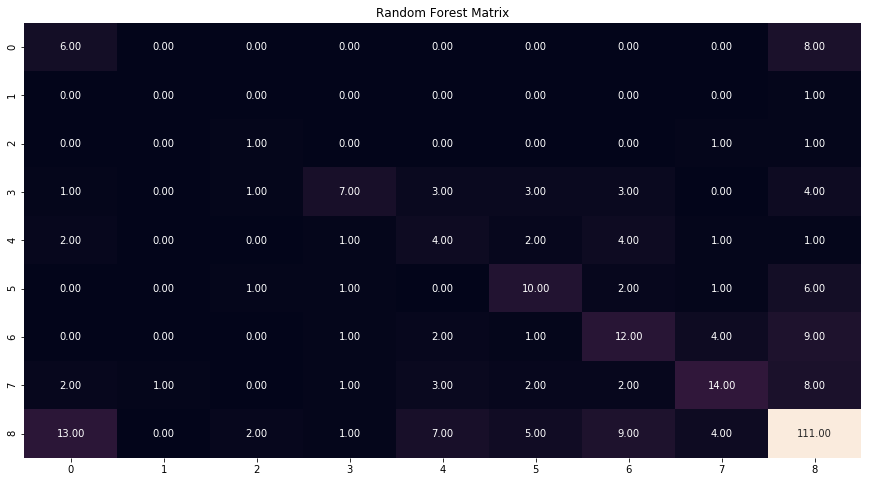

In [140]:
viz.cf_matrix(yfintest,pred_rf5, "Random Forest Matrix")

In [145]:
knn_clf = KNeighborsClassifier().fit(xsm, ysm)

knn_clf.score(xfintest, yfintest)

0.2

In [273]:
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
import nltk

In [274]:
import spacy
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [1402]:
mini_corp = {"target":test_df.star_rating.to_list(), "data" :test_df.review.to_list()}

In [1405]:
x_train_counts = count_vectorizer.fit_transform(mini_corp["data"])

In [1414]:
count_vectorizer.vocabulary_.get('recommend')

2768

In [1415]:
tf_transformer = TfidfTransformer(use_idf=False).fit(x_train_counts)
x_train_tf = tf_transformer.transform(x_train_counts)

In [1404]:
rdf = reviews_only_df.review.apply(word_tokenize)

In [1417]:
clf = MultinomialNB()
clf.fit(x_train_tf, mini_corp["target"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [1418]:
text_clf = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])

In [1420]:
text_clf.fit(mini_corp["data"], mini_corp["target"])

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
 ...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [1996]:
import gensim
nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')
nltk.download('gutenberg')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/flatironschool/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/flatironschool/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/flatironschool/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [2052]:
import re

In [2152]:
# |[\s]{2,}
pattern = r'([\.\,\'\\(\)\"\-\!\%\\\``\d]|[{.*}?\n]|)'
rev_only_one_df["clean_all_review"] = rev_only_one_df.all_review.apply(lambda x: re.sub(pattern, "", x))

In [2153]:
pattern2 = r'[\s]{2,}'
rev_only_one_df["clean_all_review"] = rev_only_one_df.clean_all_review.apply(lambda x: re.sub(pattern2, " ", x))

In [2156]:
rev_only_one_df["clean_all_review"] = rev_only_one_df["clean_all_review"].str.lower().str.strip("[]")
rev_only_one_df["tokenized"] = rev_only_one_df["clean_all_review"].apply(nltk.word_tokenize)

In [2167]:
rev_only_one_df

,business_name,all_review,clean_all_review,tokenized,tagged
0,Manhattan Prep,"[""I had an absolutely amazing experience in Vi...",i had an absolutely amazing experience in vict...,"[i, had, an, absolutely, amazing, experience, ...","[(i, NN), (had, VBD), (an, DT), (absolutely, R..."
1,180 Degrees LSAT,"[""Larkin is by far the best LSAT tutor in New ...",larkin is by far the best lsat tutor in new yo...,"[larkin, is, by, far, the, best, lsat, tutor, ...","[(larkin, NN), (is, VBZ), (by, IN), (far, RB),..."
2,Bright Kids NYC,"[""Updated review 2 check-ins I received my son...",updated review checkins i received my sons ise...,"[updated, review, checkins, i, received, my, s...","[(updated, VBN), (review, NN), (checkins, VBZ)..."
3,Veritas Prep,"[""I took the in person prep course with Eric M...",i took the in person prep course with eric mal...,"[i, took, the, in, person, prep, course, with,...","[(i, NN), (took, VBD), (the, DT), (in, IN), (p..."
4,Premier Aptitude,['I visited Premier Aptitude a couple of month...,i visited premier aptitude a couple of months ...,"[i, visited, premier, aptitude, a, couple, of,...","[(i, NN), (visited, VBD), (premier, JJR), (apt..."
5,Talent Prep,"[""Updated review Could not have asked for a be...",updated review could not have asked for a bett...,"[updated, review, could, not, have, asked, for...","[(updated, VBN), (review, NN), (could, MD), (n..."
6,MyGuru,['I would recommend MyGuru for test preparatio...,i would recommend myguru for test preparation ...,"[i, would, recommend, myguru, for, test, prepa...","[(i, NN), (would, MD), (recommend, VB), (mygur..."
7,Project Management Academy,['Very satisfied with this class and with my i...,very satisfied with this class and with my ins...,"[very, satisfied, with, this, class, and, with...","[(very, RB), (satisfied, JJ), (with, IN), (thi..."
8,Kweller Prep,['My daughter was accepted to Hunter High Scho...,my daughter was accepted to hunter high school...,"[my, daughter, was, accepted, to, hunter, high...","[(my, PRP$), (daughter, NN), (was, VBD), (acce..."
9,Bee Tutored,"[""First to Review My two daughters attended NY...",first to review my two daughters attended nyc ...,"[first, to, review, my, two, daughters, attend...","[(first, RB), (to, TO), (review, VB), (my, PRP..."


In [2000]:
from nltk.tree import Tree

In [2176]:
rev_only_one_df["clean_all_review"][1000]

' checkins first to review i enrolled my daughter for ballet after hearing great things about this school yolanda has been running this dance academy for over years and is one of the best in the areathey have won tons of trophies at competitionsmy daughter loved her first day and the teacher marianna was really sweet their tutu outfits with leotards are too cuteand its fun watching all the lil girls trying to match their steps i will review this place again once she has completed a term signed up my daughter for ballet and jazz so far so good my daughter likes it and it makes me happy cons only one the waiting area is extremely too small to where some parents have to wait outside in the street waiting room would be nice if it was larger and fit all the parents'

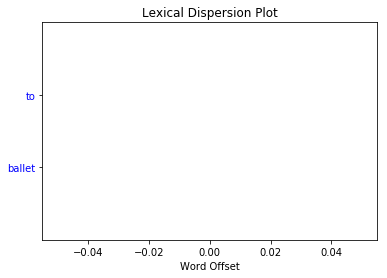

In [2180]:
nltk.draw.dispersion_plot(rev_only_one_df["clean_all_review"][1000], ["to", "ballet"])

Source: <br>
Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.

In [2161]:
rev_only_one_df["tagged"] = rev_only_one_df["tokenized"].apply(nltk.pos_tag)

In [1990]:
t = Tree("S", rev_only_one_df.tagged[0][:10])

In [1970]:
rev_only_one_df.tagged[0]

[('i', 'NN'),
 ('had', 'VBD'),
 ('an', 'DT'),
 ('absolutely', 'RB'),
 ('amazing', 'JJ'),
 ('experience', 'NN'),
 ('in', 'IN'),
 ('victoria', 'JJ'),
 ('crutchfield', 'NN'),
 ("'s", 'POS'),
 ('gre', 'JJ'),
 ('class', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('i', 'JJ'),
 ("'m", 'VBP'),
 ('certain', 'JJ'),
 ('my', 'PRP$'),
 ('fellow', 'JJ'),
 ('classmates', 'NNS'),
 ('did', 'VBD'),
 ('as', 'RB'),
 ('well', 'RB'),
 ('.', '.'),
 ('i', 'VB'),
 ('just', 'RB'),
 ('finished', 'VBN'),
 ('my', 'PRP$'),
 ('last', 'JJ'),
 ('class', 'NN'),
 ('with', 'IN'),
 ('victoria', 'NNS'),
 ('and', 'CC'),
 ('feel', 'VB'),
 ('confident', 'JJ'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('ability', 'NN'),
 ('attack', 'VBP'),
 ('the', 'DT'),
 ('gre', 'NN'),
 ('.', '.'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('that', 'IN'),
 (',', ','),
 ('i', 'VB'),
 ('went', 'VBD'),
 ('from', 'IN'),
 ('dreading', 'VBG'),
 ('math', 'NN'),
 ('to', 'TO'),
 ('truly', 'RB'),
 ('enjoying', 'VBG'),
 ('it', 'PRP'),
 ('thanks', 'VBZ'),
 ('to', 'TO'),
 (

In [1890]:
len(df_biz_tri.name.tolist())

1855

In [1896]:
df_biz_tri2 = df_biz_tri[df_biz_tri.name!="Bambini After School"]

In [1873]:
df_biz_tri2.drop(["index"], axis=1, inplace=True)

In [1876]:
df_biz_tri2.name[354]

'Huntington Learning Center'

In [1879]:
df_biz_tri2.name[354] == rev_only_one_df.business_name[354]

True

In [1920]:
reviews_only_df.review.tolist()

["I had an absolutely amazing experience in Victoria Crutchfield's GRE class, and I'm certain my fellow classmates did as well. I just finished my last class with Victoria and feel confident in my ability attack the GRE. More than that, I went from dreading math to truly enjoying it thanks to her enthusiasm and tutelage.  Victoria has every quality of a truly great teacher you can possibly imagine and then some - she really cares about where you're at and how to get you to where you want to be in terms of the material, strategies, and score. I started the class a decade removed from GRE level math and now fully fully confident in my ability to learn any concept and apply the strategies we learned in class to the test. She is incredibly mindful of the class's level of comfort with the material as a whole and always checks in to make sure everyone is understanding explanations, concepts, and strategies.  Highly recommended for anyone at any level. Of comfort with the material.",
 'Elaine